# Module 3: Machine Learning
## Sprint 3: Unsupervised Learning & Hyperparameter Tuning
## Part 5: LendingClub


## About this Part

Congrats!
You have reached the last Part of this Sprint.
In this Part, you will put what you learned during this and the previous Sprints into practice.
As the final assignment of this Sprint, you solve a lending automation problem for LendingClub.
You will have to apply all you have learned about training and deploying machine learning models to complete this task.
Our expectation is that you'll use your own judgment on how to perform the analysis and select the most important avenues of modeling, statistical testing, and exploration.
You'll have to iteratively try to find patterns in the data, raise hypotheses and use your data analysis skills to get answers.

## Context

Imagine that you are a data scientist who was just hired by the LendingClub.
They want to automate their lending decisions fully, and they hired you to lead this project.
Your team consists of a product manager to help you understand the business domain and a software engineer who will help you integrate your solution into their product.
During the initial investigations, you've found that there was a similar initiative in the past, and luckily for you, they have left a somewhat clean dataset of LendingClub's loan data.
The dataset is located in a public bucket here: <https://storage.googleapis.com/335-lending-club/lending-club.zip> (although you were wondering if having your client data in a public bucket is such a good idea).
In the first meeting with your team, you all have decided to use this dataset because it will allow you to skip months of work of building a dataset from scratch.
In addition, you have decided to tackle this problem iteratively so that you can get test your hypothesis that you can automate these decisions and get actual feedback from the users as soon as possible.
For that, you have proposed a three-step plan on how to approach this problem.
The first step of your plan is to create a machine learning model to classify loans into accepted/rejected so that you can start learning if you have enough data to solve this simple problem adequately.
The second step is to predict the grade for the loan, and the third step is to predict the subgrade and the interest rate.
Your team likes the plan, especially because after every step, you'll have a fully-working deployed model that your company can use.
Excitedly you get to work!

## Objectives for this Part

- Practice downloading datasets from external sources.
- Practice performing EDA.
- Practice applying statistical inference procedures.
- Practice using various types of machine learning models.
- Practice building ensembles of machine learning models.
- Practice using hyperparameter tuning.
- Practice using AutoML tools.
- Practice deploying machine learning models.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice reading data, performing queries, and filtering data.

## Requirements

- Download the data from [here](https://storage.googleapis.com/335-lending-club/lending-club.zip).
- Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
- Perform statistical inference. This should include defining the target population, forming multiple statistical hypotheses and constructing confidence intervals, setting the significance levels, conducting z or t-tests for these hypotheses.
- Apply various machine learning models to predict the target variables based on your proposed plan. You should use hyperparameter tuning, model ensembling, the analysis of model selection, and other methods. The decision where to use and not to use these techniques is up to you, however, they should be aligned with your team's objectives.
- Deploy these machine learning models to Google Cloud Platform. You are free to choose any deployment option you wish as long as it can be called an HTTP request.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results you got, and what these results mean.
- Provide suggestions about how your analysis and models can be improved.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Depth of your analysis. Did you just skim the surface, or did you explored the dataset in-depth?
- Model's performance. How well did your model perform the predictions?
- Model's deployment. How performant, robust, and scalable your model deployment is?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structured? Did you use the appropriate levels of abstraction? Did you remove commented-out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use suitable algorithms and data structures to solve the problems?

## Sample Correction Questions

During a correction, you may get asked questions that test your understanding of covered topics.

- What dimensionality reduction algorithms do you know? What are their differences?
- What is the curse of dimensionality?
- What is the difference between DBSCAN and HDBSCAN?
- What hyperparameter tuning strategies do you know? What are their advantages compared to Grid Search and Random Search?
- Explain how SMOTE algorithm works? In which circumstances is this algorithm the most useful and in which it falls short?
- What is AutoML? Why is it important?


## Table of contents
* [Introduction](#introduction)
* [Data Content & Cleaning](#data_content_cleaning)
* [Exploratory Data Analysis](#eda)
* [Inferential Statistical Analysis](#inf)
* [Machine Learning](#ml)
* [Conclusion](#conclusion)

## **Introduction**<a name="introduction"></a>

I will analyze LendingClub's loan data. Data consists of two files - the one with a clients whose applications for a loan were accepted and another file - with clients whose application for a loan were rejected. Data set contains various  financial indicators of a clients as well as some general information about client like job title, how long person is employed, annual income and etc. I will do a data cleaning first, then EDA part, Inferential Statistics Analyzes and lastly a Machine Learning modeling. For Modeling part a first objective is to predict ```whether client is going to receive a loan based on a data about client```, a second objective to predict ```a grade for the loan``` and a third one to predict ```the subgrade and the interest rate.```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import ast
import warnings
import shap
import optuna
from optuna.integration import LightGBMPruningCallback, XGBoostPruningCallback
import joblib
import scipy.stats as stats
import statsmodels.api as sm
from helper_functions import nominal
from helper_functions.general_functions import (
    highlight_min,
    calc_ratio,
)
from helper_functions.plotting_functions import (
    line_plot,
    two_line_plot,
    two_line_plot_2,
    cat_plot,
    plot_single_violin,
    plot_violin,
    catplot_with_pct,
    heat_map,
    plot_mean_diff_conf_int,
    plot_perm_diffs,
    plot_cm,
    plot_multi_cm,
    plot_roc_auc,
    plot_pr_auc,
    plot_residuals,
    plot_reg,
)
from helper_functions.statistical_functions import (
    sampling_mean_diff_ci,
    perm_test,
    diff_in_two_means_unpooled_ci,
)
from helper_functions.ml_functions import (
    annual_inc_outliers_detect,
    percentile_outliers_detect,
    get_month,
    cyclic_month,
    get_earliest_cr_line_month_year,
    cyclic_earliest_cr_line_month,
    emp_length_missing_imputer,
    states_binning,
    pipeline_objective,
    tune_pipeline,
    KmeansClustering,
    KmeansClusterDistance,
    baseline_clfmodels_eval_cv,
    baseline_regmodels_eval_cv,
    sgdclf_hptuned_eval_cv,
    tune_model,
    light_gbm_objective,
    light_gbm_hptuned_eval_cv,
    clfmodels_eval_test,
    make_mi_scores,
    get_shap_feature_names,
    subgrade_models,
    intrate_models,
)
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    StandardScaler,
    RobustScaler,
    OneHotEncoder,
    FunctionTransformer,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import (
    Ridge,
    Lasso,
    LogisticRegression,
    SGDClassifier,
    SGDRegressor,
)
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import f1_score, mean_squared_error, classification_report

sns.set_theme(style="darkgrid")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 160)
pd.options.display.float_format = "{:.3f}".format
np.set_printoptions(suppress=True)
warnings.filterwarnings("ignore")
optuna.logging.set_verbosity(optuna.logging.WARNING)
%matplotlib inline

### **Data Content & Cleaning**<a name="data_content_cleaning"></a>

In [2]:
accepted_df = pd.read_csv('datasets/accepted_2007_to_2018Q4.csv', low_memory=False)

We are keeping a missing values in some columns for now to better represent distribution and picking up data for 2017 year.

In [3]:
accepted_df["issue_d"] = pd.to_datetime(
    accepted_df["issue_d"], format="%b-%Y"
).dt.strftime("%Y-%m-%d")
accepted_df = accepted_df[
    (accepted_df["issue_d"] > "2016-12-31") & (accepted_df["issue_d"] < "2018-01-01")
]

In [4]:
accepted_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
528963,120122535,NaN,12000.000,12000.000,12000.000,36 months,7.970,375.880,A,A5,associate,10+ years,OWN,42000.000,Source Verified,2017-09-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,923xx,CA,27.740,0.000,Jun-1996,715.000,719.000,0.000,NaN,80.000,9.000,1.000,11457.000,37.000,16.000,w,6688.310,6688.310,6397.930,6397.930,5311.690,1086.240,0.000,0.000,0.000,Mar-2019,375.880,Apr-2019,Mar-2019,729.000,725.000,0.000,NaN,1.000,Individual,NaN,NaN,NaN,0.000,0.000,30502.000,1.000,2.000,1.000,3.000,8.000,19045.000,73.000,2.000,4.000,7117.000,53.000,31000.000,1.000,1.000,2.000,7.000,3389.000,7144.000,53.900,0.000,0.000,131.000,255.000,1.000,1.000,0.000,14.000,NaN,8.000,NaN,0.000,2.000,6.000,2.000,2.000,7.000,7.000,9.000,6.000,9.000,0.000,0.000,0.000,3.000,100.000,0.000,1.000,0.000,57180.000,30502.000,15500.000,26180.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
528964,120122034,NaN,16000.000,16000.000,16000.000,36 months,7.970,501.170,A,A5,Senior Investigator,5 years,RENT,79077.000,Not Verified,2017-09-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,223xx,VA,15.940,0.000,Jun-2000,700.000,704.000,0.000,38.000,NaN,12.000,0.000,16217.000,57.700,20.000,w,8917.810,8917.810,8511.190,8511.190,7082.190,1429.000,0.000,0.000,0.000,Feb-2019,501.170,Apr-2019,Mar-2019,689.000,685.000,0.000,63.000,1.000,Individual,NaN,NaN,NaN,0.000,0.000,128572.000,0.000,1.000,0.00

In [5]:
rejected_df = pd.read_csv("datasets/rejected_2007_to_2018Q4.csv")

In [6]:
rejected_df["Application Date"] = pd.to_datetime(
    rejected_df["Application Date"], format="%Y-%m-%d"
)
rejected_df = rejected_df[
    (rejected_df["Application Date"] > "2016-12-31")
    & (rejected_df["Application Date"] < "2018-01-01")
]

In [7]:
rejected_df.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
3024671,20000.000,2017-01-01,debt_consolidation,NaN,0%,316xx,GA,NaN,0.000
3024672,15000.000,2017-01-01,home_improvement,NaN,0.58%,190xx,PA,< 1 year,0.000
3024673,1000.000,2017-01-01,Debt consolidation,528.000,0%,775xx,TX,< 1 year,0.000
3024674,2500.000,2017-01-01,car,NaN,1.7%,199xx,DE,5 years,0.000
3024675,6000.000,2017-01-01,credit_card,NaN,2.93%,761xx,TX,5 years,0.000


###  **Exploratory data analysis**<a name="eda"></a>

####  **Accepted loans dataset analysis**

We are going to analyze a subset of most important and interesting features of 2017 accepted loans.

In [8]:
col_to_keep = [
    "loan_amnt",
    "term",
    "int_rate",
    "installment",
    "grade",
    "sub_grade",
    "emp_title",
    "emp_length",
    "home_ownership",
    "annual_inc",
    "issue_d",
    "loan_status",
    "title",
    "addr_state",
    "dti",
    "fico_range_low",
    "fico_range_high",
]
cols_to_drop_eda = [col for col in accepted_df.columns if col not in col_to_keep]
accepted_eda = accepted_df.drop(cols_to_drop_eda, axis=1)

In [9]:
accepted_eda.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_low,fico_range_high
count,443579.000,443579.000,443579.000,443579.000,443065.000,443579.000,443579.000
mean,14845.060,13.244,442.493,80105.560,19.223,700.297,704.297
std,9632.635,5.189,283.152,204105.583,17.583,34.184,34.185
min,1000.000,5.320,7.610,0.000,-1.000,660.000,664.000
25%,7200.000,9.930,237.060,47000.000,11.950,675.000,679.000
50%,12000.000,12.620,364.940,66000.000,17.980,695.000,699.000
75%,20000.000,15.990,593.960,95000.000,24.740,720.000,724.000
max,40000.000,30.990,1719.830,110000000.000,999.000,845.000,850.000


From numerical features summary table we see that ```loan_amnt``` varies from 1000 to 40000 US dollars. 40000 US Dollars is the maximum limit of a loan a ```LendingClub``` provides to the individual clients.\
As we can see ```interest rate``` varies quite a bit - from 5.32 % to 30.99 %.\
```Installment``` is the monthly payment owed by the borrower for the loan. It's varies from mere 7.6 USD to 1719 USD per month. It depends on the loan amount, term and interest rates.\
```annual_inc``` varies from 25 USD to 110 million, so we have outliers both in the lower and upper bounds of ```anual_inc``` distribution. We will explore those instances with min and max values further on.\
```dti``` is Debt-to-Income ratio and measures the amount of income a person generates in order to service a debt. A ```DTI``` of **43 %** is typically the highest ratio a borrower can have and still get qualified for a mortgage, but lenders generally seek ratios of no more than **36 %**. As we see the minimum value is -1 which means client has a negative incomes but still got a loan. Maximum value is 999, which might be an error in a data, because it mean that yours monthly installment is 999 bigger than your incomes per month.\
```Fisco score``` is composite metric that takes into account data in five areas to determine creditworthiness: payment history, current level of indebtedness, types of credit used, length of credit history, and new credit accounts. Scores range from 300 to 850, with scores in the 670 to 739 range considered to be "good" credit history. We see that clients whose application for a loan were accepted have a ```fisco score``` between 660 and 845 in this data set.

We see some inconsistency in data, as ```DTI``` being negative but ```loan_status``` is ```Fully Paid```. We will deal with outliers in Machine Learning section.

In [10]:
accepted_eda[accepted_eda['dti'] < 0]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,title,addr_state,dti,fico_range_low,fico_range_high
1681348,17000.000,60 months,13.490,391.080,C,C2,teacher,10+ years,MORTGAGE,75000.000,2017-03-01,Fully Paid,Debt consolidation,IN,-1.000,685.000,689.000


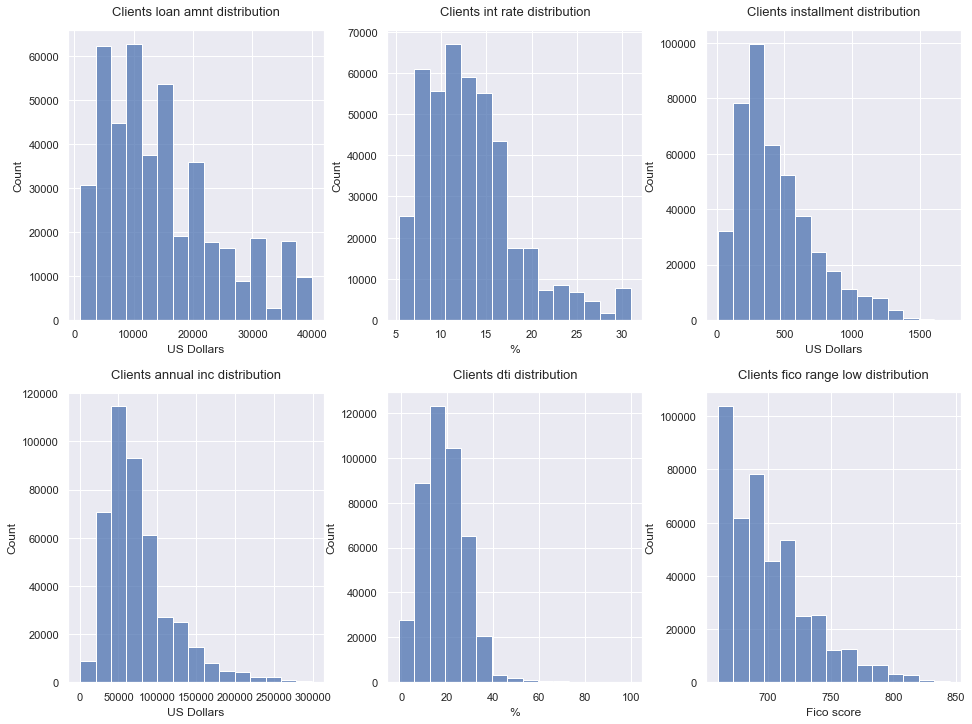

In [11]:
subset = accepted_eda[
    (accepted_eda["dti"] < 100) & (accepted_eda["annual_inc"] < 300000)
]

col_lst = [
    "loan_amnt",
    "int_rate",
    "installment",
    "annual_inc",
    "dti",
    "fico_range_low",
]
measure_lst = ["US Dollars", "%", "US Dollars", "US Dollars", "%", "Fico score"]

fig, axes = plt.subplots(
    2, 3, figsize=(16, 12), gridspec_kw={"hspace": 0.25, "wspace": 0.25},
)

for i, ax in enumerate(axes.flatten()):

    sns.histplot(
        data=subset, x=subset[col_lst[i]], bins=15, ax=ax,
    )
    ax.set_xlabel(f"{measure_lst[i]}", fontsize=12, labelpad=5)
    ax.ticklabel_format(style="plain")
    ax.set_ylabel("Count", fontsize=12, labelpad=5)
    ax.set_title(
        f"Clients {' '.join(col_lst[i].split('_'))} distribution", fontsize=13, y=1.03
    )


plt.show()

As we see from the plots, even capping ```annual_inc``` and ```dti``` values at 300000 US Dollars and 100 % respectively, we still see higly right skewed distribution for those features. 

In [12]:
grade_order = pd.CategoricalDtype(["A", "B", "C", "D", "E", "F", "G"], ordered=True)
accepted_eda["grade"] = accepted_eda["grade"].astype(grade_order)
x_labels = ["A", "B", "C", "D", "E", "F", "G"]
subplot_titles = accepted_eda["term"].unique()

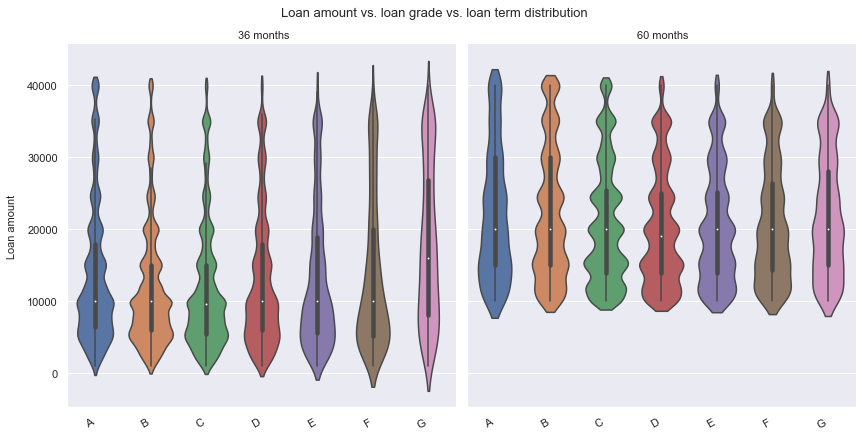

In [13]:
plot_violin(
    accepted_eda,
    "grade",
    "loan_amnt",
    "term",
    x_labels,
    "Loan amount",
    subplot_titles,
    "Loan amount vs. loan grade vs. loan term distribution",
)

From this violin plot we see that ```36 months``` loans start from small amount and ranges to the maximum of 40000 US Dollars, although main distribution is concentrated around 10000 US Dollars loans. Contrarily ```60 months``` loans starts from 10000 US Dollars and also goes up to 40000 US Dollars, but loan distribution is more even. Loan grade does not have significant impact on loan size.

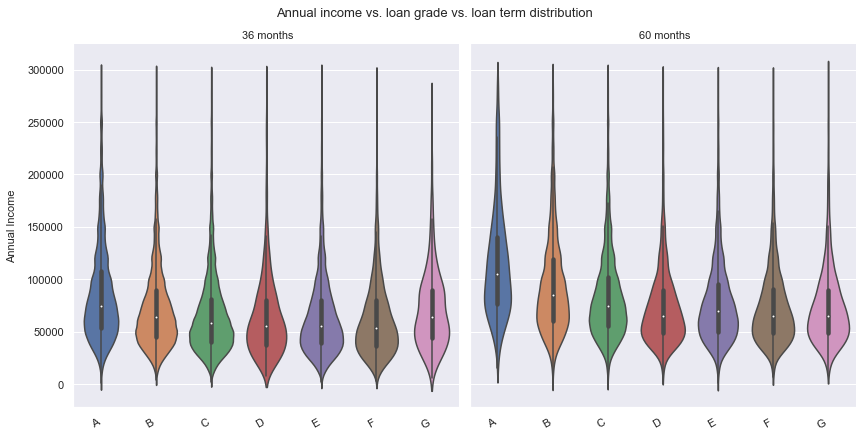

In [14]:
plot_violin(
    subset,
    "grade",
    "annual_inc",
    "term",
    x_labels,
    "Annual Income",
    subplot_titles,
    "Annual income vs. loan grade vs. loan term distribution",
)

The results are expected. Clients with higher ```annual income``` receives bigger ```grade A``` loans while clients with lower ```annual income``` gets lower grade loans. Interesting trend we see for ```36 months``` loans, as income median increased for F and G grade loans.\
Let's also check how interest rate is distributed among ```36 months``` and ```60 months``` loans.

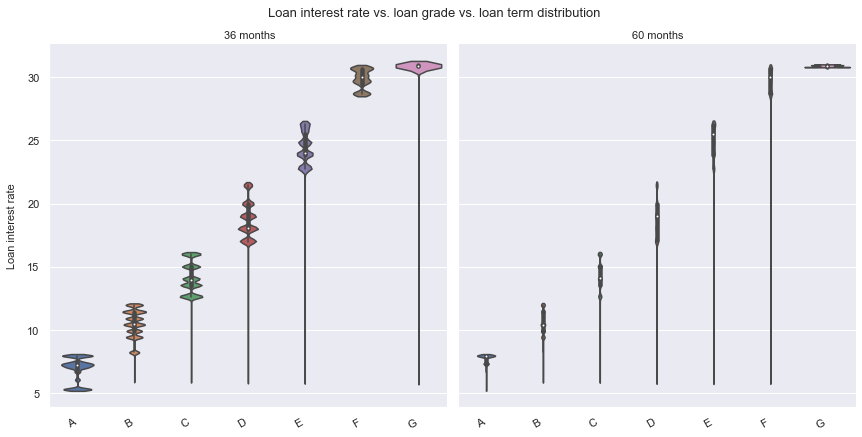

In [15]:
plot_violin(
    accepted_eda,
    "grade",
    "int_rate",
    "term",
    x_labels,
    "Loan interest rate",
    subplot_titles,
    "Loan interest rate vs. loan grade vs. loan term distribution",
)

We see that the higher grade is for a loan, the lower interest rates are. Also ```A grade``` loans for both ```36``` and ```60``` months have fewer outliers than other grade loans.\
Let's now analyze some categorical features and their interactions. 

In [16]:
states_df = accepted_eda.groupby("addr_state", as_index=False).agg(
    {"annual_inc": "median", "term": "size"}
)
states_df.rename(
    columns={"annual_inc": "annual_income_median", "term": "size",}, inplace=True,
)
states_df["ratio"] = ((states_df["size"] / states_df["size"].sum()) * 100).round(2)
with open("datasets/states_abbrv.txt") as f:
    states = ast.literal_eval(f.read())
states_df.replace(
    {
        key: value
        for (key, value) in states.items()
        if key in states_df.addr_state.to_list()
    },
    inplace=True,
)

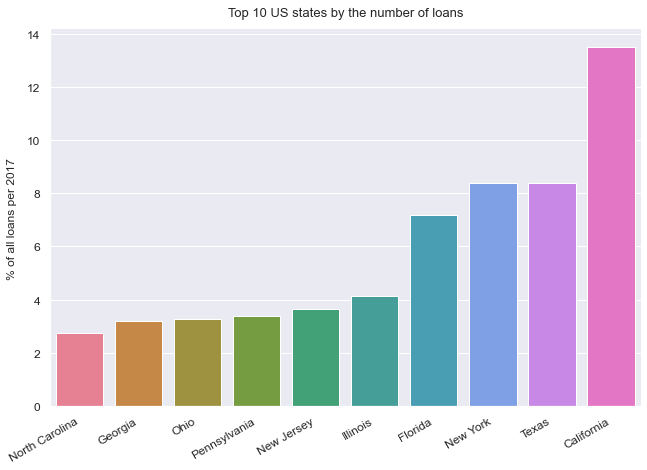

In [17]:
top_10_states = states_df.sort_values(by="ratio")[-10:]

cat_plot(
    top_10_states,
    "addr_state",
    "ratio",
    "% of all loans per 2017",
    "Top 10 US states by the number of loans",
)

We see that ```California``` is the number one state by issued loans, followed by ```Texas``` and ```New York```. Top 5 states are also featured in Top 5 states by population according to https://beef2live.com/story-population-state-89-114254 so it's mainly related with the size of population in the state.

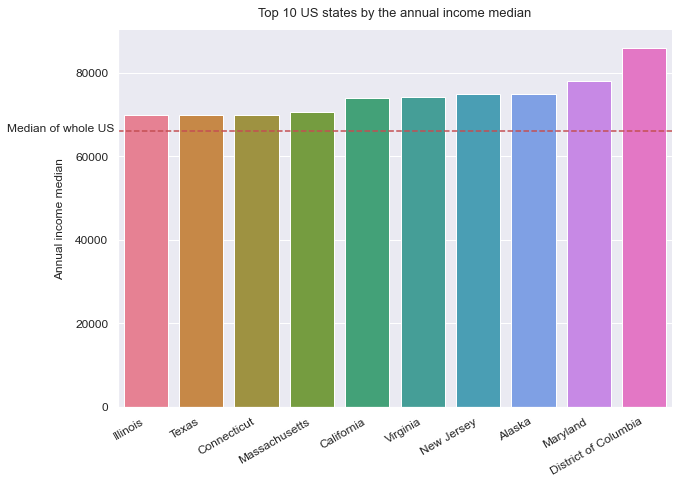

In [18]:
top_10_states_inc = states_df.sort_values(by="annual_income_median")[-10:]
cat_plot(
    top_10_states_inc,
    "addr_state",
    "annual_income_median",
    "Annual income median",
    "Top 10 US states by the annual income median",
)

plt.axhline(y=accepted_eda["annual_inc"].median(), color="r", linestyle="dashed")
plt.text(-2.5, accepted_eda["annual_inc"].median(), "Median of whole US", size=12)

plt.show()

We chose a ```median``` to better represent different states ```annual income``` distribution because right skewed distribution shifts mean to the higher side. As we see we have different states in top10 compared with previous top10 of states by number of loans issued. Clients from ```District of Columbia``` (Washington City), ```Maryland``` and ```Alaska``` have highest median income. The state of ```California``` is only in the 6th place.

In [19]:
accepted_eda["emp_title"].fillna('Unknow', inplace=True)
accepted_eda["emp_title"] = accepted_eda["emp_title"].apply(lambda x: x.capitalize())
title_emp_length = accepted_eda.groupby(["emp_title"], as_index=False).size()
title_emp_length["ratio"] = (
    (title_emp_length["size"] / title_emp_length["size"].sum()) * 100
).round(2)
title_emp_length = title_emp_length.sort_values(by="ratio", ascending=True)[-11:-1]

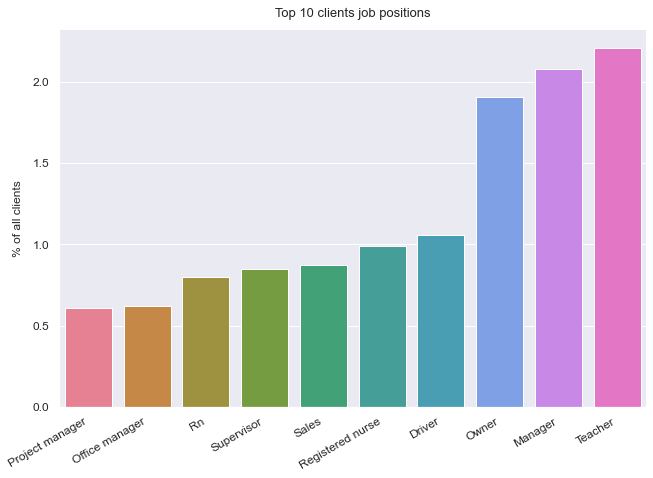

In [20]:
cat_plot(
    title_emp_length,
    "emp_title",
    "ratio",
    "% of all clients",
    "Top 10 clients job positions",
)

We see that most popular job positions are ```Teacher```, ```Manager``` and ```Owner```. As we see each of those positions makes around 2 % of total clients (there are over 400000 accepted loans during 2017 year) so we can't say that several job positions dominate distribution of who is taking a loan.

In [21]:
accepted_eda["fico_score"] = pd.cut(
    accepted_eda["fico_range_low"],
    bins=[660, 669, 739, 799, np.inf],
    labels=[
        "Fair (580-669)",
        "Good (670-739)",
        "Very Good (740-799)",
        "Exceptional (800+)",
    ],
    include_lowest=True,
)
fico_term = accepted_eda.groupby(["fico_score", "term"], as_index=False).size()
fico_term = fico_term.groupby("term").apply(calc_ratio)

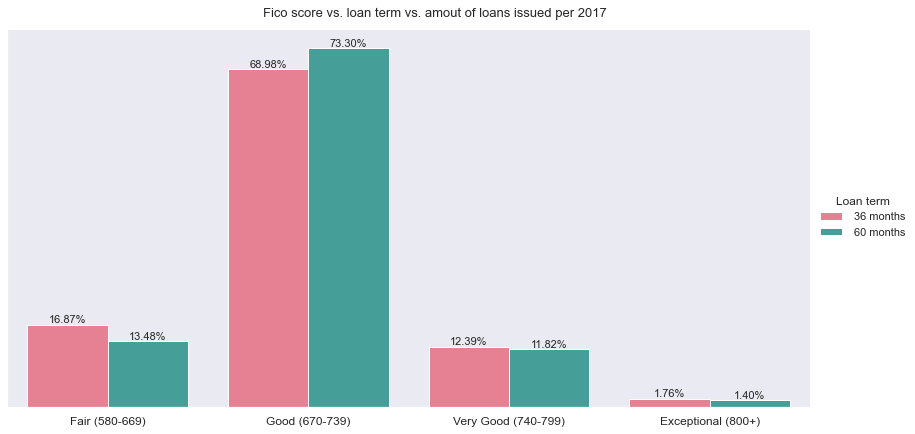

In [22]:
catplot_with_pct(
    fico_term,
    "fico_score",
    "ratio",
    "term",
    "Loan term",
    "Fico score vs. loan term vs. amout of loans issued per 2017",
)

We see that majority of clients whose applications were accepted for both ```36``` and ```60``` months term falls in a ```Good``` Fico score category. ```Fair``` and ```Very Good``` categories take up similar share of clients. ```Exceptional``` category is well - Exceptional, consisting of only 1.40 % and 1.76 % of all clients who got loans. 

In [23]:
title_empl = (
    accepted_eda.groupby(["title", "emp_length"], as_index=False)
    .size()
    .sort_values(by="size")[-40:]
)
emp_order = pd.CategoricalDtype(
    [
        "8 years",
        "9 years",
        "7 years",
        "6 years",
        "5 years",
        "4 years",
        "1 year",
        "3 years",
        "2 years",
        "< 1 year",
        "10+ years",
    ],
    ordered=True,
)

title_empl["emp_length"] = title_empl["emp_length"].astype(emp_order)
title_order = pd.CategoricalDtype(
    [
        "Car financing",
        "Medical expenses",
        "Major purchase",
        "Other",
        "Home improvement",
        "Credit card refinancing",
        "Debt consolidation",
    ],
    ordered=True,
)
title_empl["title"] = title_empl["title"].astype(title_order)

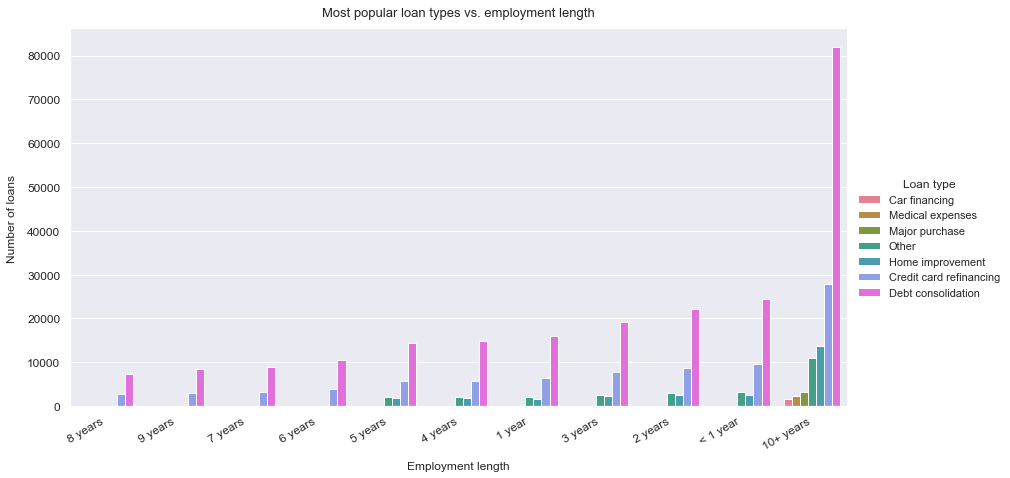

In [24]:
g = sns.catplot(
    x="emp_length",
    y="size",
    data=title_empl,
    hue="title",
    kind="bar",
    ci=None,
    height=6,
    aspect=2,
    palette="husl",
)

g.axes.flat[0].set_xlabel("Employment length", fontsize=12, labelpad=10)
g.axes.flat[0].set_ylabel("Number of loans", fontsize=12, labelpad=10)
g.axes.flat[0].set_xticklabels(
    g.axes.flat[0].get_xticklabels(), rotation=30, ha="right", fontsize=12
)
g.axes.flat[0].set_yticklabels(g.axes.flat[0].get_yticklabels(), fontsize=12)
g._legend.set_title("Loan type")
g._legend.get_title().set_fontsize(12)

plt.title(
    "Most popular loan types vs. employment length", fontsize=13, y=1.02,
)

plt.show()

As we see, most popular purpose for a loan is ```Debt consolidation```, followed by ```Credit card refinancing``` and ```Other```. Most loans were issued for a clients with employment time of 10 years and more, so we can see that from the data that ```LendingClub``` values clients with longer employment time and willing to fund them.\
Also interesting that in a second place are clients who have been working less that for a year. Looks like people who got a job recently are keen to take a loan as they have flow of income guaranteed from their newly acquired jobs. In the third and fourth place are clients with 2 and 3 year working experience respectively.

In [25]:
status_emp = accepted_eda.groupby(["loan_status", "emp_length"], as_index=False).size()
status_emp["ratio"] = ((status_emp["size"] / accepted_eda.shape[0]) * 100).round(2)
subset_2 = status_emp[
    status_emp["loan_status"].isin(["Charged Off", "Default", "Late (31-120 days)"])
]
subset_2["emp_length"] = subset_2["emp_length"].astype(emp_order)
status_order = pd.CategoricalDtype(
    ["Default", "Late (31-120 days)", "Charged Off",], ordered=True,
)
subset_2["loan_status"] = subset_2["loan_status"].astype(status_order)

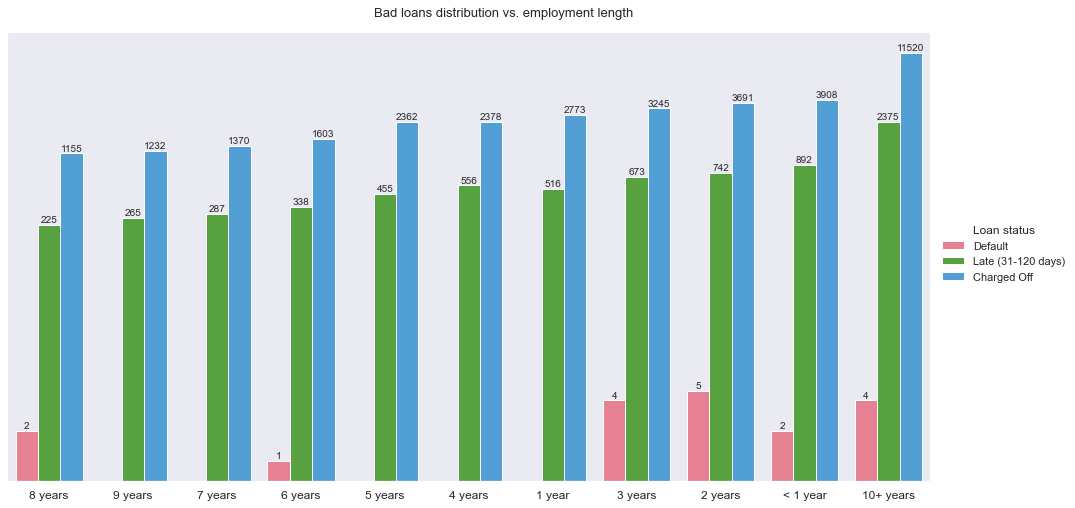

In [26]:
g = sns.catplot(
    x="emp_length",
    y="size",
    hue="loan_status",
    data=subset_2,
    kind="bar",
    ci=None,
    height=7,
    aspect=2,
    palette="husl",
)

g._legend.set_title("Loan status")

ax = g.axes.flat[0]
ax.set_xlabel("")
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        size=10,
        textcoords="offset points",
    )

g.axes.flat[0].get_yaxis().set_visible(False)
g.axes.flat[0].tick_params(axis="x", which="major", labelsize=12)
g.fig.suptitle("Bad loans distribution vs. employment length", fontsize=13, y=1.03)
plt.setp(g._legend.get_title(), fontsize=12)
plt.yscale("log")

plt.show()

Some context for this graph:\
When borrowers miss several payments, the loan will enter ```Default``` status and, when there is no longer a reasonable expectation of further borrower payments, the loan will be ```Charged Off```. ```Charged Off``` typically occurs when a loan is 120 days or more past due.\
If we sum all bad loans - appr. **10 %** of all issued loans per 2017 year falls to one of mentioned 3 categories. As we saw in a previous graph - clients with 10 or more years of work experience got biggest percentage of total loans, likewise in this graph their share in a bad loans is the biggest too. We don't see strange variations in other groups clients too compared with previous graph.

In [27]:
subset_3 = (
    accepted_eda[accepted_eda["home_ownership"].isin(["OWN", "RENT", "MORTGAGE"])]
    .groupby(["home_ownership", "emp_length"], as_index=False)
    .agg({"loan_amnt": "mean"})
)
own_order = pd.CategoricalDtype(["RENT", "OWN", "MORTGAGE"], ordered=True,)
subset_3["home_ownership"] = subset_3["home_ownership"].astype(own_order)
emp_ord = pd.CategoricalDtype(
    [
        "3 years",
        "5 years",
        "6 years",
        "4 years",
        "1 year",
        "2 years",
        "8 years",
        "7 years",
        "9 years",
        "10+ years",
        "< 1 year",
    ],
    ordered=True,
)
subset_3["emp_length"] = subset_3["emp_length"].astype(emp_ord)

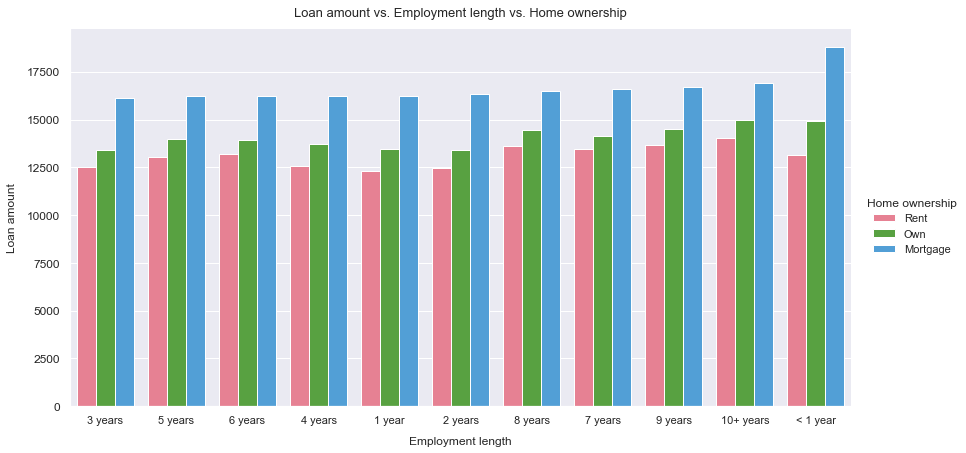

In [28]:
g = sns.catplot(
    x="emp_length",
    y="loan_amnt",
    data=subset_3,
    hue="home_ownership",
    kind="bar",
    ci=None,
    height=6,
    aspect=2,
    palette="husl",
)

g._legend.set_title("Home ownership")
for t in g._legend.texts:
    t.set_text(t.get_text().capitalize())

g.axes.flat[0].set_xlabel("Employment length", fontsize=12, labelpad=10)
g.axes.flat[0].set_ylabel("Loan amount", fontsize=12, labelpad=10)
g.axes.flat[0].set_yticklabels(g.axes.flat[0].get_yticklabels(), fontsize=12)

plt.title(
    "Loan amount vs. Employment length vs. Home ownership", fontsize=13, y=1.02,
)

plt.show()

We see that clients who ```Rents``` a real estate take a smallest loans, followed by clients who  ```Own``` a real estate. Clients who have a ```Mortgage``` take biggest loan on average.\
The ```Employment length``` also have an impact for loan size - clients with less that ```1 year``` work experience and who have ```Mortgage``` tend to take bigger loans. In the second place there are clients with ```more than 10 year``` work experience and in a third place - clients with ```9 year``` work experience.

In [29]:
accepted_eda["month"] = pd.DatetimeIndex(accepted_eda["issue_d"]).month
accepted_eda["fico_avg"] = (
    accepted_eda["fico_range_low"] + accepted_eda["fico_range_high"]
) / 2
subset_4 = accepted_eda.groupby("month", as_index=False).agg(
    {
        "loan_amnt": "mean",
        "int_rate": "mean",
        "dti": "mean",
        "installment": "mean",
        "fico_avg": "mean",
        "term": "size",
    }
)

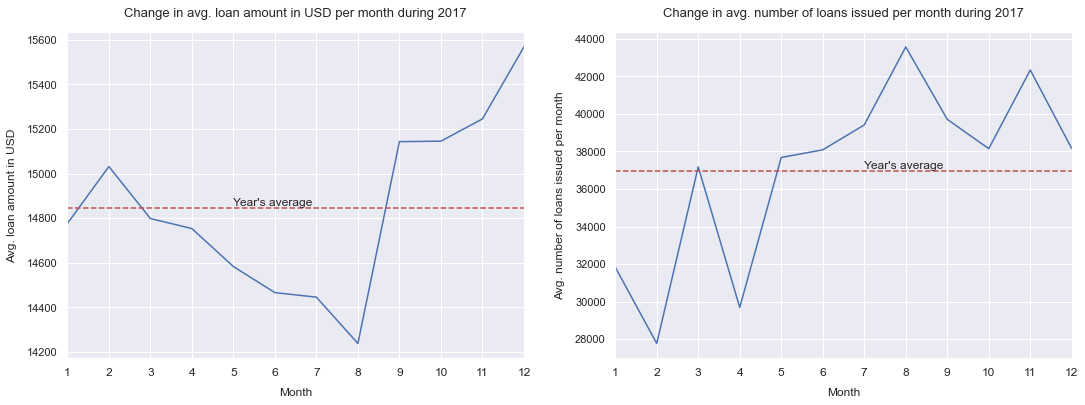

In [30]:
two_line_plot(
    subset_4,
    ["month", "month"],
    ["loan_amnt", "term"],
    [accepted_eda["loan_amnt"].mean(), accepted_eda.shape[0] / 12],
    ((5, accepted_eda["loan_amnt"].mean() + 10), (7, accepted_eda.shape[0] / 12 + 100)),
    [range(1, 13), range(1, 13)],
    [subset_4["month"], subset_4["month"]],
    ["Month", "Month"],
    ["Avg. loan amount in USD", "Avg. number of loans issued per month"],
    [
        "Change in avg. loan amount in USD per month during 2017",
        "Change in avg. number of loans issued per month during 2017",
    ],
)


plt.show()

Analyzing both graphs next to each other we see interesting trend - when average loan size is at its minimum, the average number of loans issued per month is at its maximum. We see that on August 2017 there were a lot of smaller loan issued and the average amount per month is over 40000 loans, when year's average is around 34000 loans.

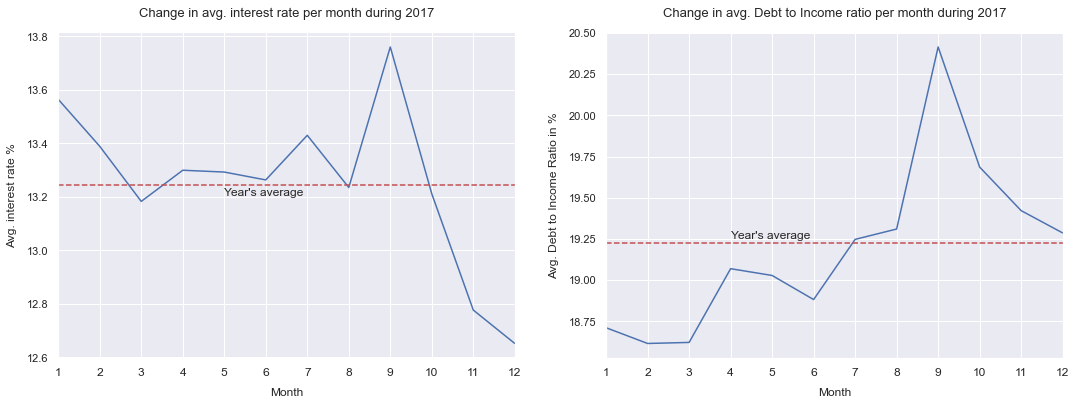

In [31]:
two_line_plot(
    subset_4,
    ["month", "month"],
    ["int_rate", "dti"],
    [accepted_eda["int_rate"].mean(), accepted_eda["dti"].mean()],
    (
        (5, accepted_eda["int_rate"].mean() - 0.04),
        (4, accepted_eda["dti"].mean() + 0.03),
    ),
    [range(1, 13), range(1, 13)],
    [subset_4["month"], subset_4["month"]],
    ["Month", "Month"],
    ["Avg. interest rate %", "Avg. Debt to Income Ratio in %"],
    [
        "Change in avg. interest rate per month during 2017",
        "Change in avg. Debt to Income ratio per month during 2017",
    ],
)

In both grahps we see the rise of ```interest rate``` and ```Debt-to-Income``` ratio till the September 2017. Then we see decline in both indicators till the end of the year.

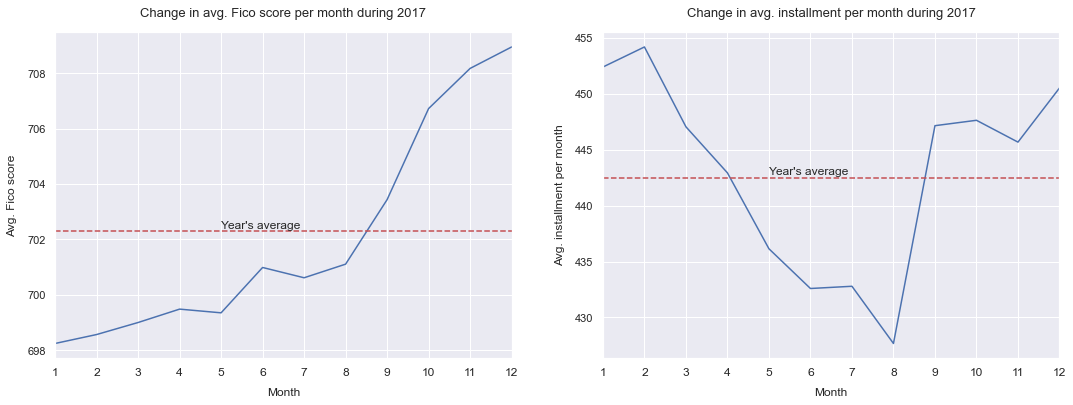

In [32]:
two_line_plot(
    subset_4,
    ["month", "month"],
    ["fico_avg", "installment"],
    [accepted_eda["fico_avg"].mean(), accepted_eda["installment"].mean()],
    (
        (5, accepted_eda["fico_avg"].mean() + 0.1),
        (5, accepted_eda["installment"].mean() + 0.3),
    ),
    [range(1, 13), range(1, 13)],
    [subset_4["month"], subset_4["month"]],
    ["Month", "Month"],
    ["Avg. Fico score", "Avg. installment per month"],
    [
        "Change in avg. Fico score per month during 2017",
        "Change in avg. installment per month during 2017",
    ],
)


plt.show()

We see ```Fico``` score increasing from month to month, meaning ```LendingClub``` was more likely to accept clients applications for a loan and as we saw from previous graph - an avg. amount of loan issued to the clients was increasing from the August 2017 to till the end of the year.\
```Installment``` was decreasing till came to reversal on August 2017 and was increasing too till the end of the year. As it positively correlates to the loan size, this behavior is expected.

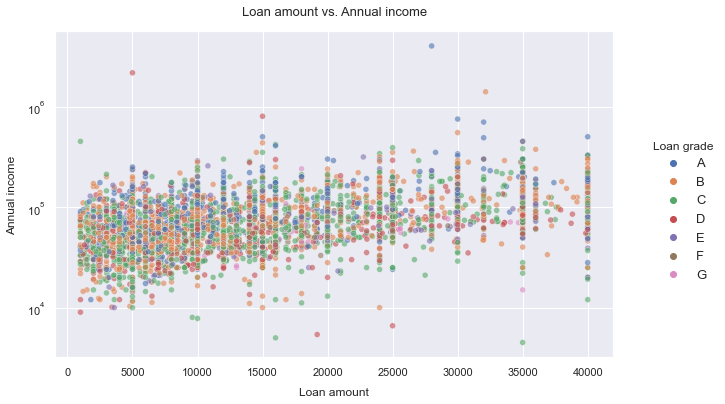

In [33]:
subset5 = accepted_eda.sample(5000, random_state=42)

plt.figure(figsize=(10, 6))

ax = sns.scatterplot(
    x="loan_amnt", y="annual_inc", data=subset5, hue="grade", alpha=0.6
)

ax.legend(
    bbox_to_anchor=(1.05, 0.7),
    title="Loan grade",
    facecolor="white",
    edgecolor="white",
    fontsize=13,
)

ax.tick_params(axis="both", which="both", labelsize=11)
ax.set_ylabel("Annual income", labelpad=10, fontsize=12)
ax.set_xlabel("Loan amount", labelpad=10, fontsize=12)
ax.set_title("Loan amount vs. Annual income", fontsize=13, y=1.03)
plt.yscale("log")

plt.show()

We plotted 5000 data points sampled from our data set to overcome overplotting. We see that there is small positive correlation between ```Loan amount``` and ```Annual income ```features. ```Grade A``` loans are most popular, followed by ```B``` and ```C``` grades.

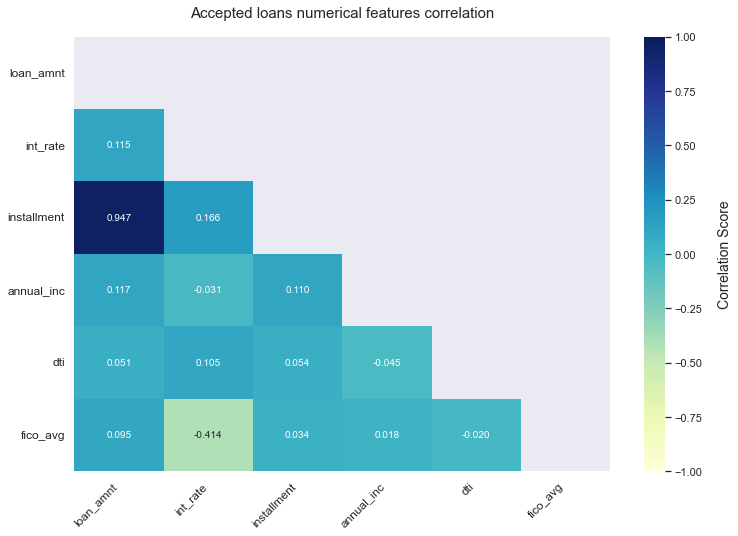

In [34]:
num_col = ["loan_amnt", "int_rate", "installment", "annual_inc", "dti", "fico_avg"]

heat_map(
    accepted_eda[num_col].corr(),
    "Accepted loans numerical features correlation",
    "Correlation Score",
    (12, 8),
    cmap="YlGnBu",
)

As we see from the heatmap - basically correlation is weak between numerical features, except ```installment``` and ```loan_amnt``` pair correlation of 0.946, which means those features have very strong correlation which is expected as size of monthly payment amount depends on a loan size. Another quite strong correlation is between  ```fico_avg``` and ```int_rate```. This time it's a negative correlation meaning when ```fico_avg``` is increasing an ```int_rate``` is decreasing. That's it - a clients with higher ```fico``` score get better interest rate as lender evaluates those clients as less risky.

In [35]:
cat_cols = [
    "term",
    "grade",
    "sub_grade",
    "emp_length",
    "loan_status",
    "title",
    "addr_state",
]
subset_cram = accepted_eda.loc[:, cat_cols]
subset_cram["grade"] = subset_cram["grade"].astype("object")
cramers_corr = nominal.compute_associations(subset_cram)

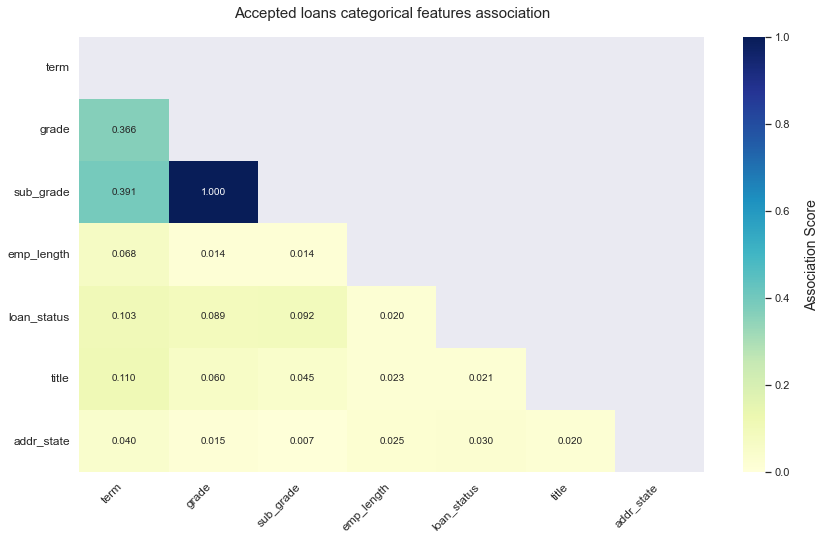

In [36]:
heat_map(
    cramers_corr,
    "Accepted loans categorical features association",
    "Association Score",
    (14, 8),
    vmin=0,
    cmap="YlGnBu",
)

Let's calculate ```Cramer's V``` statistic for categorical-categorical association. ```Cramer's V``` is based on a nominal variation of Pearson’s Chi-Square Test and measures association between two categorical variables.\
Cramer's association between 0.3 and 0.5 is considered moderate, and association bigger than 0.5 is considered to be strong.\
From the heat map we see, that only 3 features - ```grade```, ```sub_grade``` and ```term``` have moderate or high association. ```Grade``` and ```sub_grade``` have association score of 1, which is expected as ```sub_grade``` derives directly from ```grade```. Loan ```term``` is moderately associated with both ```grade``` and ```sub_grade``` and can be a good feature for our machine learning classification model.

#### **Rejected loans data set analysis**

In [37]:
rejected_eda = rejected_df.drop(["Zip Code", "Policy Code"], axis=1)
rejected_eda["Debt-To-Income Ratio"] = (
    rejected_eda["Debt-To-Income Ratio"].replace("%", "", regex=True).astype("float")
)

In [38]:
rejected_eda.describe()

,Amount Requested,Risk_Score,Debt-To-Income Ratio
count,7072573.000,3826324.000,7072573.000
mean,12811.605,633.843,118.202
std,14767.045,65.243,1785.294
min,0.000,300.000,-1.000
25%,4000.000,593.000,8.160
50%,10000.000,635.000,20.350
75%,19850.000,672.000,37.100
max,300000.000,990.000,1143590.000


We see that clients requested amounts which are way off LendingClub maximum cap of 40000 US Dollars. Also ```Risk_Score's```, equivalent to ```fico``` score in accepted data set, mean and minimums is way lower compared with clients in accepted data set. We also have same situation with ```DTI``` feature which has negative values and also very high values.

In [39]:
rejected_eda[rejected_eda['Debt-To-Income Ratio'] > 100]

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,State,Employment Length
3024678,5000.000,2017-01-01,debt_consolidation,NaN,257.830,IN,< 1 year
3024766,30000.000,2017-01-01,Credit card refinancing,811.000,116.770,CA,< 1 year
3024777,9000.000,2017-01-01,Debt consolidation,618.000,113.120,AL,< 1 year
3024784,5000.000,2017-01-01,moving,NaN,203.370,VA,< 1 year
3024895,10000.000,2017-01-01,other,NaN,1000.000,CA,< 1 year
...,...,...,...,...,...,...,...
26244123,10000.000,2017-06-30,credit_card,NaN,363.870,TX,< 1 year
26244126,10000.000,2017-06-30,debt_consolidation,NaN,395.400,CA,< 1 year
26244137,1000.000,2017-06-30,other,NaN,101.640,AZ,< 1 year
26244148,25000.000,2017-06-30,other,NaN,447.150,HI,5 years


There are over 187000 clients whose monthly incomes are equal to the amount required to service their debts.

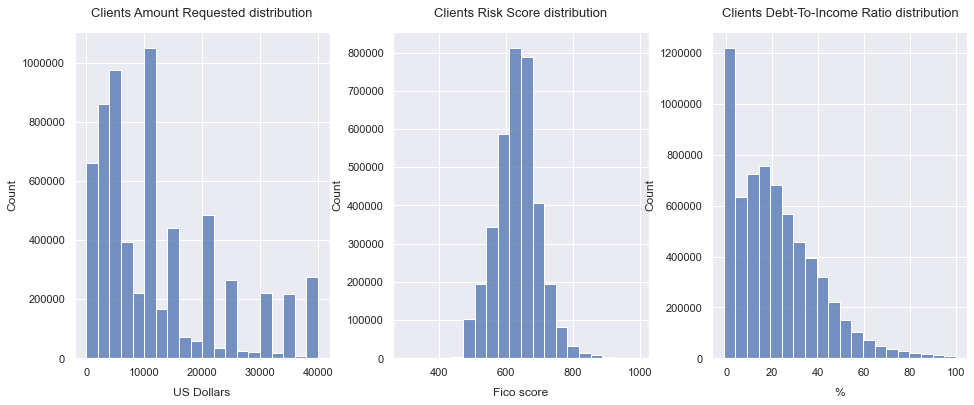

In [40]:
subset_rej = rejected_eda[
    (rejected_eda["Debt-To-Income Ratio"] < 100)
    & (rejected_eda["Amount Requested"] <= 40000)
]

col_lst = [
    "Amount Requested",
    "Risk_Score",
    "Debt-To-Income Ratio",
]

measure_lst = ["US Dollars", "Fico score", "%"]

fig, axes = plt.subplots(
    1, 3, figsize=(16, 6), gridspec_kw={"hspace": 0.25, "wspace": 0.25},
)

for i, ax in enumerate(axes.flatten()):

    sns.histplot(
        data=subset_rej, x=subset_rej[col_lst[i]], bins=20, ax=ax,
    )
    ax.set_xlabel(f"{measure_lst[i]}", fontsize=12, labelpad=10)
    ax.ticklabel_format(style="plain")
    ax.set_ylabel("Count", fontsize=12, labelpad=5)
    ax.set_title(
        f"Clients {' '.join(col_lst[i].split('_'))} distribution", fontsize=13, y=1.03
    )

plt.show()

We capped ```DTI``` at 100 % and ```Amount Requested``` at LendingClub's maximum limit for a loan.\
```Fisco (Risk) Score``` distribution resembles Normal Gaussian distribution. We see that frequency is biggest in 600 - 700 range. As we know, Fisco scores from 670 and higher usually indicate “good” credit history. We can see that majority of distribution falls around that limit.\
Although we capped ```DTI``` at 100 % we still see that distribution is heavily ```Right Skewed```. Clients with over 40% of DTI usually face difficulty for qualifying for a loan.

In [41]:
emp_order_rej = pd.CategoricalDtype(
    [
        "< 1 year",
        "1 year",
        "2 years",
        "3 years",
        "4 years",
        "5 years",
        "6 years",
        "7 years",
        "8 years",
        "9 years",
        "10+ years",
    ],
    ordered=True,
)

subset_rej["Employment Length"] = subset_rej["Employment Length"].astype(emp_order_rej)

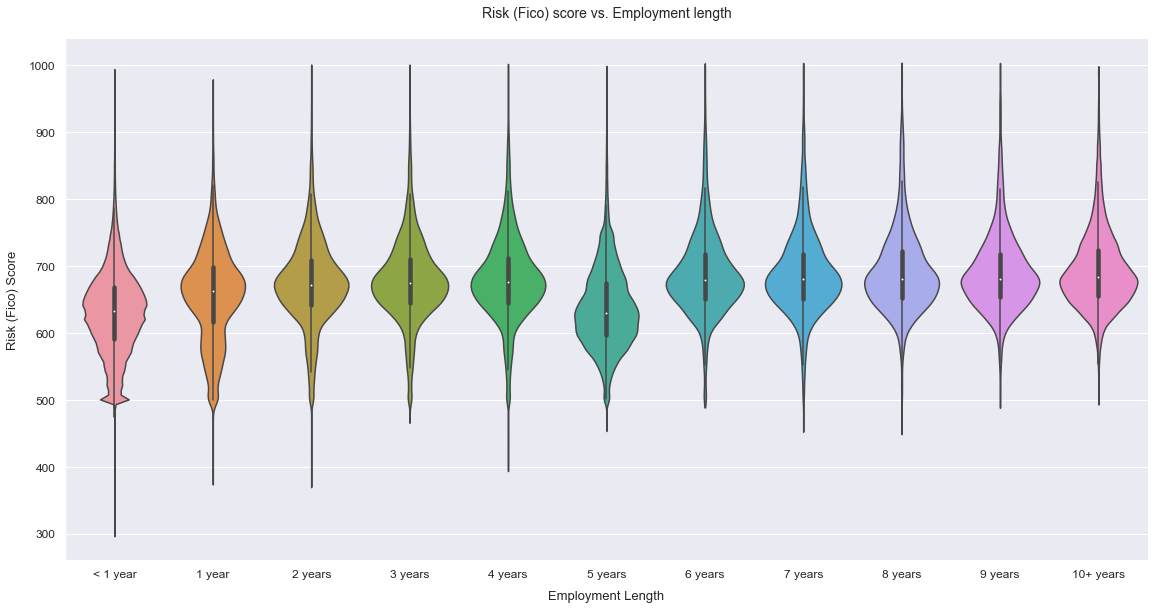

In [42]:
plot_single_violin(
    subset_rej,
    "Employment Length",
    "Risk_Score",
    "Employment Length",
    "Risk (Fico) Score",
    "Risk (Fico) score vs. Employment length",
)

From the violin plot we see that all ```Employment Length``` categories have an outliers. Also clients with ```less than 1 year``` work experience have lowest score distribution. Interesting case is ```5 years``` employment length category which has lowest ```median``` and overall distribution is also quite low compared with other categories. We can compare same plot with accepted data set and check differences.

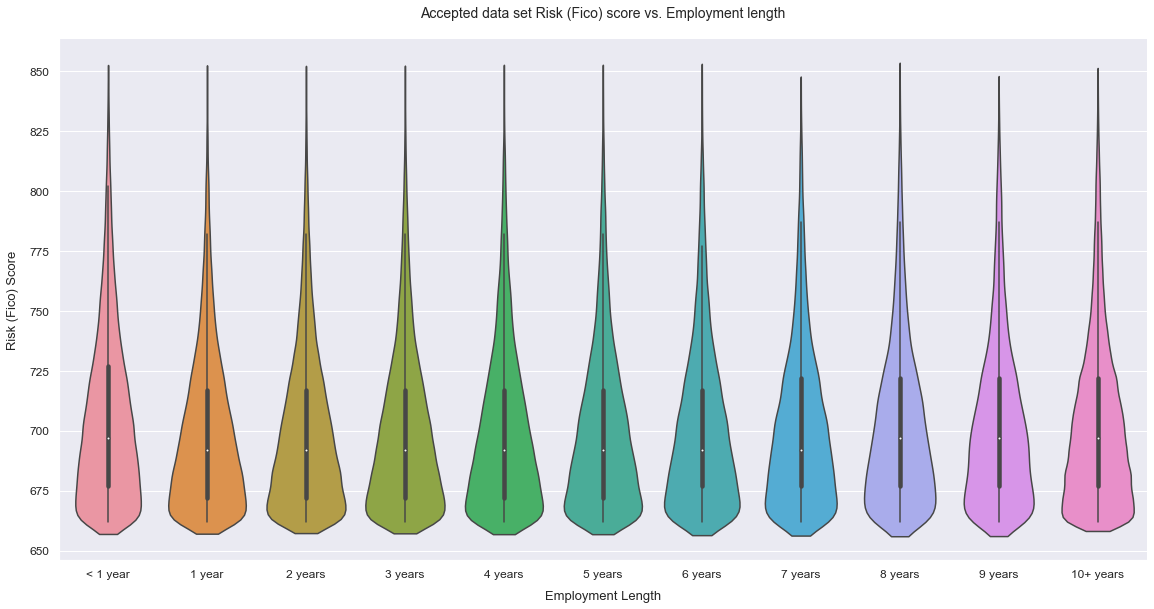

In [43]:
accepted_eda["emp_length"] = accepted_eda["emp_length"].astype(emp_order_rej)

plot_single_violin(
    accepted_eda,
    "emp_length",
    "fico_avg",
    "Employment Length",
    "Risk (Fico) Score",
    "Accepted data set Risk (Fico) score vs. Employment length",
)

As we see ```Fico``` scores in accepted loans data set starts from around 660. ```Employment length``` separate categories distributions almost identical with median fluctuating in 680 - 690 range. 

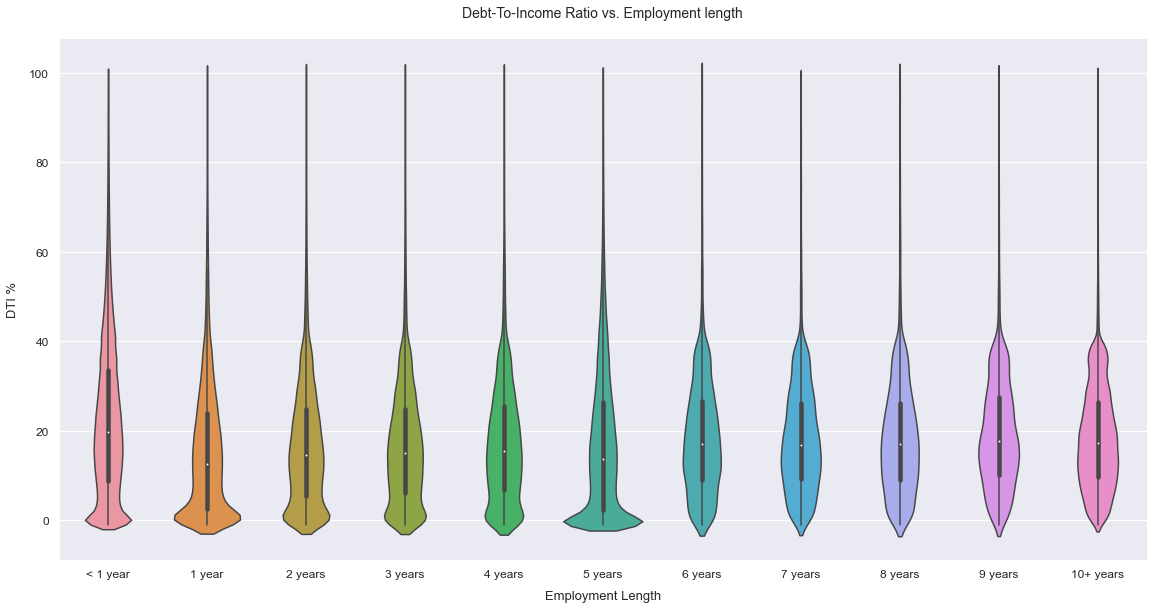

In [44]:
plot_single_violin(
    subset_rej,
    "Employment Length",
    "Debt-To-Income Ratio",
    "Employment Length",
    "DTI %",
    "Debt-To-Income Ratio vs. Employment length",
)

Again we see that all ```Employment length``` categories have outliers in a upper range, although we capped ```DTI``` at 100 %. Interesting that a lot of clients who have ```5 year``` work experience have **0** ```DTI``` ratio. It means that they don't have any debts or expenses, which does not necessarily mean that that they are financially ready to apply for a loan. As we saw from previous violin plot - their ```Risk (Fico)``` score distribution is second lowest among all clients.

In [45]:
states_rej_df = rejected_eda.groupby("State", as_index=False).agg(
    {"Amount Requested": "mean", "Application Date": "size"}
)
states_rej_df.rename(
    columns={"Amount Requested": "requested_amount_mean", "Application Date": "size",},
    inplace=True,
)
states_rej_df["ratio"] = (
    (states_rej_df["size"] / states_rej_df["size"].sum()) * 100
).round(2)
states_rej_df.replace(
    {
        key: value
        for (key, value) in states.items()
        if key in states_rej_df.State.to_list()
    },
    inplace=True,
)
top10_rej_states = states_rej_df.sort_values(by="size")[-10:]
top10_rej_states_mean = states_rej_df.sort_values(by="requested_amount_mean")[-10:]

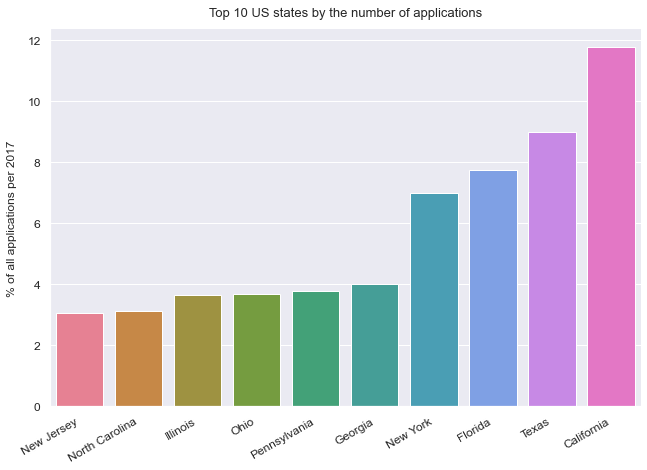

In [46]:
cat_plot(
    top10_rej_states,
    "State",
    "ratio",
    "% of all applications per 2017",
    "Top 10 US states by the number of applications",
)

Comparing states by applications and accepted loans we see almost the same states, except ```Georgia``` instead of ```Ilinois``` in accepted data set. 

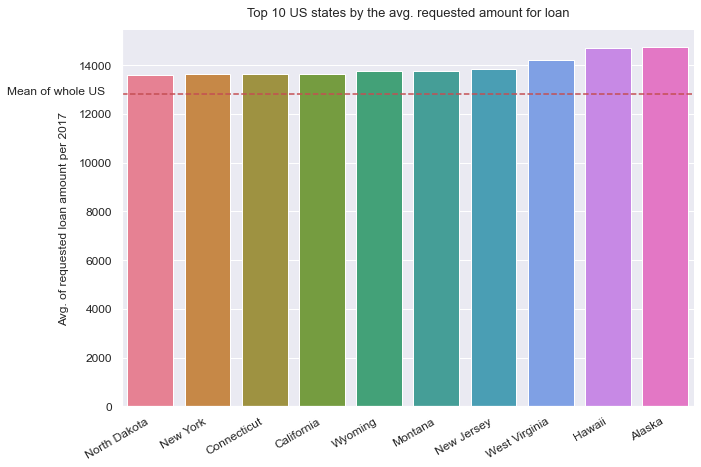

In [47]:
cat_plot(
    top10_rej_states_mean,
    "State",
    "requested_amount_mean",
    "Avg. of requested loan amount per 2017",
    "Top 10 US states by the avg. requested amount for loan",
)

plt.axhline(y=rejected_eda["Amount Requested"].mean(), color="r", linestyle="dashed")
plt.text(-2.5, rejected_eda["Amount Requested"].mean(), "Mean of whole US", size=12)

plt.show()

We calculated mean because in rejected applications data set we do not have so many outliers in ```Amount Requested``` feature as compared with ```Annual income``` in accepted loans data set. 

In [48]:
rejected_eda["Loan Title"].fillna("Unknow", inplace=True)
rejected_eda["Loan Title"] = rejected_eda["Loan Title"].str.capitalize()
rejected_eda["Loan Title"] = rejected_eda["Loan Title"].apply(
    lambda x: " ".join(x.split("_"))
)
titles_rej = (
    rejected_eda.groupby("Loan Title", as_index=False)
    .size()
    .sort_values(by="size")[-10:]
)
titles_rej["ratio"] = ((titles_rej["size"] / rejected_eda.shape[0]) * 100).round(2)

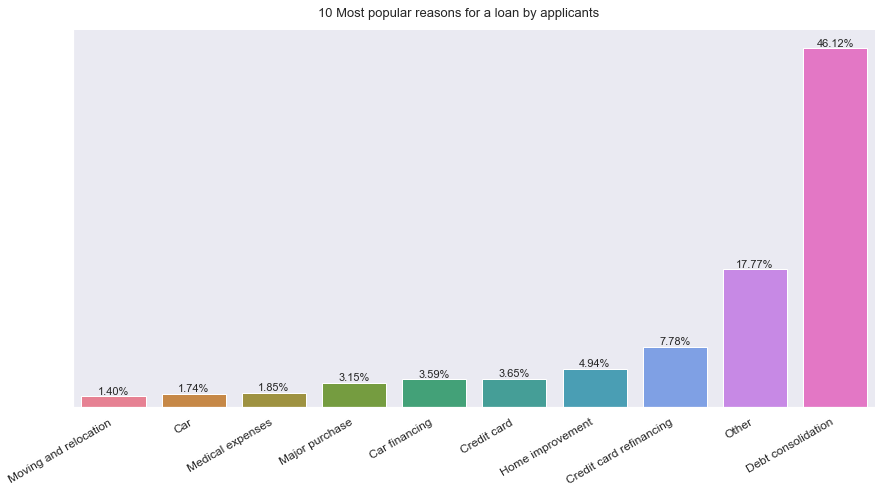

In [49]:
g = sns.catplot(
    x="Loan Title",
    y="ratio",
    data=titles_rej,
    kind="bar",
    ci=None,
    height=6,
    aspect=2,
    palette="husl",
)

ax = g.axes.flat[0]
ax.set_xlabel("")
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}%",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        size=11,
        textcoords="offset points",
    )
g.axes.flat[0].set_xticklabels(
    g.axes.flat[0].get_xticklabels(), rotation=30, ha="right", fontsize=12
)
g.axes.flat[0].get_yaxis().set_visible(False)
g.axes.flat[0].tick_params(axis="x", which="major", labelsize=12)
g.fig.suptitle("10 Most popular reasons for a loan by applicants", fontsize=13, y=1.03)

plt.show()

We see that reasons for taking loan provided by applicants are similar to the reasons of accepted applications. ```Debt consolidation``` takes 46% of all reasons, followed by ```Other``` with 17.77% and ```Credit card refinancing``` with 7.78% of all applications. 

In [50]:
rejected_eda["fico_score"] = pd.cut(
    rejected_eda["Risk_Score"],
    bins=[300, 579, 669, 739, 799, np.inf],
    labels=[
        "Poor (<580)",
        "Fair (580-669)",
        "Good (670-739)",
        "Very Good (740-799)",
        "Exceptional (800+)",
    ],
    include_lowest=True,
)
rejected_eda["month"] = pd.DatetimeIndex(rejected_eda["Application Date"]).month
fico_size = rejected_eda.groupby(["month", "fico_score"], as_index=False).size()
fico_size = fico_size.groupby("month").apply(calc_ratio)

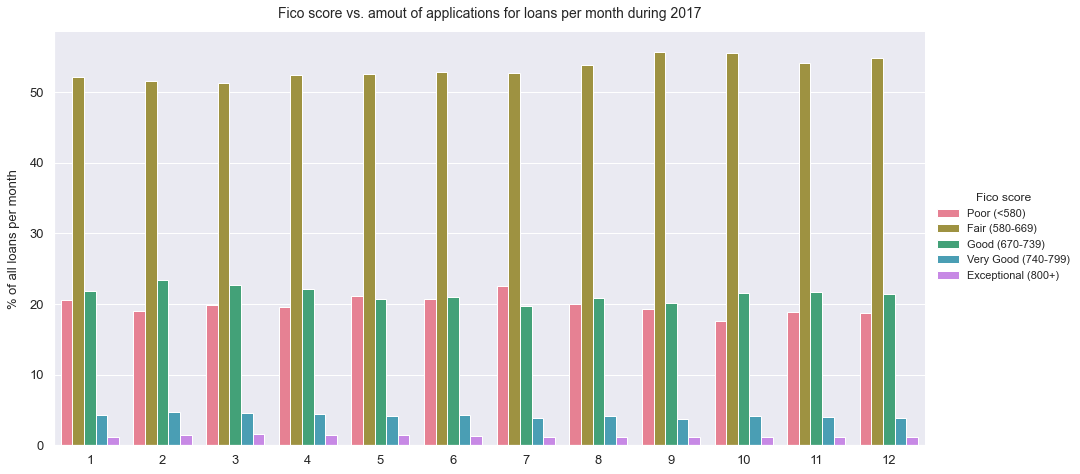

In [51]:
g = sns.catplot(
    x="month",
    y="ratio",
    data=fico_size,
    hue="fico_score",
    kind="bar",
    ci=None,
    height=6.5,
    aspect=2,
    palette="husl",
)

g.axes.flat[0].set_xlabel("")
g.axes.flat[0].set_ylabel("% of all loans per month", fontsize=13, labelpad=10)
g.axes.flat[0].set_xticklabels(g.axes.flat[0].get_xticklabels(), fontsize=13)
g.axes.flat[0].set_yticklabels(g.axes.flat[0].get_yticklabels(), fontsize=13)
g._legend.set_title("Fico score")

plt.title(
    "Fico score vs. amout of applications for loans per month during 2017",
    fontsize=14,
    y=1.02,
)

plt.show()

We see that ```Fair``` category of ```Fico``` score is most popular and quite constant from month to month.  ```Good``` and ```Poor``` Fico score categories are also constant and take quite similar share of all applicants. ```Very Good``` and ```Exceptional``` categories are rare. We can see that having a ```Good``` or even better Fico score does not automatically mean your application will be accepted as ```LendingClub``` takes a borrower's FICO score into account, but they also consider other details, such as income, how long the borrower has been at their job, and the type of credit requested to determine creditworthiness.

In [52]:
rej_subset = rejected_eda.groupby("month", as_index=False).agg(
    {"Amount Requested": "mean", "Application Date": "size", "Risk_Score": "mean",}
)

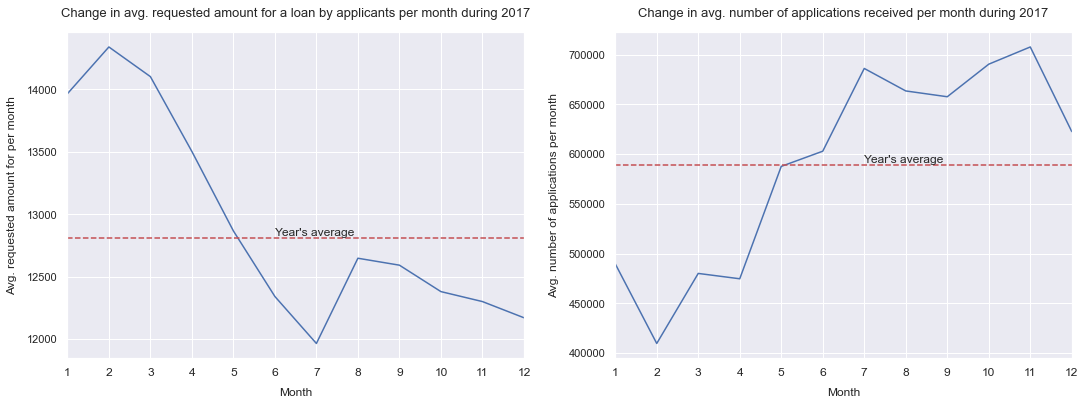

In [53]:
two_line_plot(
    rej_subset,
    ["month", "month"],
    ["Amount Requested", "Application Date"],
    [rejected_eda["Amount Requested"].mean(), rejected_eda.shape[0] / 12],
    (
        (6, rejected_eda["Amount Requested"].mean() + 20),
        (7, rejected_eda.shape[0] / 12 + 2000),
    ),
    [range(1, 13), range(1, 13)],
    [rej_subset["month"], rej_subset["month"]],
    ["Month", "Month"],
    ["Avg. requested amount for per month", "Avg. number of applications per month"],
    [
        "Change in avg. requested amount for a loan by applicants per month during 2017",
        "Change in avg. number of applications received per month during 2017",
    ],
)


plt.show()

If we compare rejected applications plots with the accepted data set, we do not see obvious relations between avg. requested amount by applicants and confirmed avg. amount for accepted loans. Contrary, change in avg. number of applications received per month resembles avg. number of issued loans per month. We see that from April 2017 - avg. application number is increasing till the November 2017. Similarly we have peaks of accepted number of loans on August and November months.

In [54]:
dti_df = rejected_eda[rejected_eda["Debt-To-Income Ratio"] <= 999]
dti_df_g = dti_df.groupby("month", as_index=False).agg(
    {"Debt-To-Income Ratio": "mean",}
)

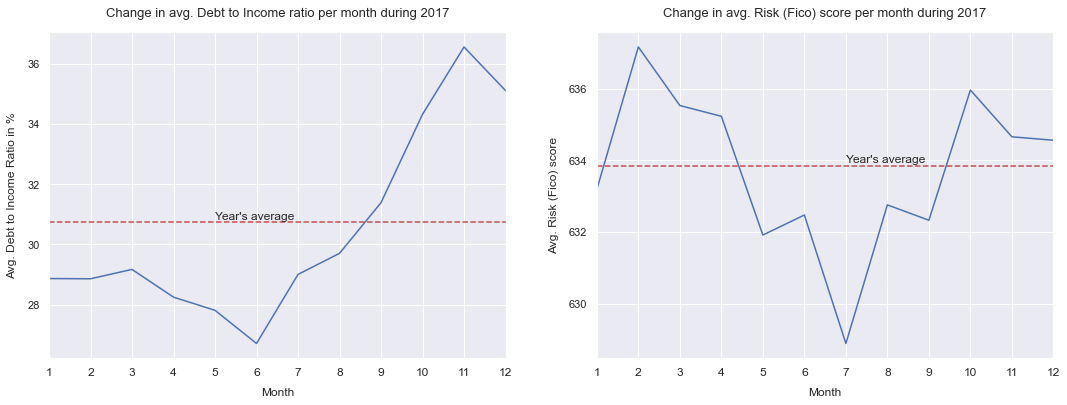

In [55]:
two_line_plot_2(
    [dti_df_g, rej_subset],
    ["month", "month"],
    ["Debt-To-Income Ratio", "Risk_Score"],
    [dti_df["Debt-To-Income Ratio"].mean(), rejected_eda["Risk_Score"].mean()],
    (
        (5, dti_df["Debt-To-Income Ratio"].mean() + 0.05),
        (7, rejected_eda["Risk_Score"].mean() + 0.1),
    ),
    [range(1, 13), range(1, 13)],
    [dti_df_g["month"], rej_subset["month"]],
    ["Month", "Month"],
    ["Avg. Debt to Income Ratio in %", "Avg. Risk (Fico) score"],
    [
        "Change in avg. Debt to Income ratio per month during 2017",
        "Change in avg. Risk (Fico) score per month during 2017",
    ],
)


plt.show()

As our ```Debt-to-Income-Ratio``` feature has a very big outliers we trimmed it to the same maximum value as accepted loans data set ```DTI``` feature. We see quite similar trend on ```Debt to Income``` plot, just values are much higher than accepted loans data set. Evaluating ```Risk (Fico) Score``` plot we need to take into consideration that almost 46 % of values are missing. So there is a risk that feature does not resemble true distribution correctly. From the plot we see that ```Fico``` score is quite low and borrowers may find it difficult to obtain financing at attractive rates.

## **Inferential Statistical Analysis**<a name="inf"></a>

### Hypothesis Testing

We are interested in knowing **whether there is a statistically significant difference between a number of loans issued per 2017 year between ```36 month``` and ```60 month``` term.**

**Null Hypothesis: $H_0$** - There is no difference in proportions between ```36 month``` and ```60 month``` term loans.   
**Alternative Hypothesis: $H_a$** - There is a difference in ```36 month``` and ```60 month``` term loan proportions.  
**Significance level: 0.05**

In [56]:
term_36_count = accepted_df[accepted_df["term"] == " 36 months"].shape[0]
term_60_count = accepted_df[accepted_df["term"] == " 60 months"].shape[0]
total = accepted_df.shape[0]
diff_in_proportions = (term_36_count / total) - (term_60_count / total)

In [57]:
prop_comb = (
    (term_36_count / total) * term_36_count + (term_60_count / total) * term_60_count
) / (term_36_count + term_60_count)
va = prop_comb * (1 - prop_comb)
se = np.sqrt(va * (1 / term_36_count + 1 / term_36_count))
test_stat = diff_in_proportions / se
pvalue = 2 * stats.norm.cdf(-np.abs(test_stat))
print(f"{test_stat:.10f}, {pvalue:.20f}")

363.1638772061, 0.00000000000000000000


Let's double check results with statmodels library two proportions ztest too.

In [58]:
successes = np.array([term_36_count, term_60_count])
samples = np.array([accepted_df.shape[0], accepted_df.shape[0]])
stat, p_value = sm.stats.proportions_ztest(
    count=successes, nobs=samples, alternative="two-sided"
)
print(f"{stat:.10f}, {p_value:.20f}")

418.8575385418, 0.00000000000000000000


We see that our Z statistic is very big, and p-value is equal to 0, that means it is lower than our  ```Significance level``` we set up earlier. Thus we **do have enough strong evidence** to reject our Null Hypothesis and state that there is significance difference in ```36 months``` and ```60 months``` loans proportions.

We are also interested if there is a **significant difference in ```annual_inc``` means between clients who own home and the ones who rents.**

**Null Hypothesis: $H_0$** - There is no difference in annual income means between clients who own a home and the ones how rent.\
**Alternative Hypothesis: $H_a$** - There is a difference in annual income means between those clients groups.  
**Significance level: 0.05**

As true standard deviation of the population (**σ**) is **unknown**, so we are going to use a **t-test.**

In [59]:
own_income = accepted_eda[accepted_eda['home_ownership'] == 'OWN']['annual_inc']
rent_income = accepted_eda[accepted_eda['home_ownership'] == 'RENT']['annual_inc']

In [60]:
t_score, p_value_t, _ = sm.stats.ttest_ind(own_income, rent_income, usevar="unequal")
print(f"{t_score:.10f}, {p_value_t:.20f}")

8.1031094131, 0.00000000000000053836


As we see, our difference in sample means is **8.1** (estimated) standard errors above the **Null Hypothesis** difference of 0 (that means are equal). As our **p-value** is much smaller than our significance level of 0.05, a probability of observing such large test statistic just by chance is **very unlikely**. We **have strong evidence** against **Null Hypothesis**, thus we reject the null and state that means are different.

**Sampling and Permutation tests**

Let's do clients who own a home and the ones who rent ```annual_inc``` sampling with 95 % confidence intervals and check how our sampled means between those clients groups differ from actual mean difference and confidence intervals.

In [61]:
mean_diff, lcb, ucb = diff_in_two_means_unpooled_ci(own_income, rent_income)
print(
    f"""Difference in two means: {mean_diff:.3f},
Lower CI bound: {lcb:.3f},
Upper CI bound: {ucb:.3f}"""
)

Difference in two means: 5970.861,
Lower CI bound: 4497.140,
Upper CI bound: 7444.582


In [62]:
actual_mean_diff, mean_diff, lcb, ucb = sampling_mean_diff_ci(
    own_income, rent_income, 500
)
print(
    f"""Actual difference of two means: {actual_mean_diff:.3f},
Mean of sampled difference of two means:{mean_diff.mean():.3f},
Sampled lcb: {lcb:.3f},
Sampled ucb: {ucb:.3f}"""
)

Actual difference of two means: 5970.861,
Mean of sampled difference of two means:6035.327,
Sampled lcb: 4652.847,
Sampled ucb: 7241.229


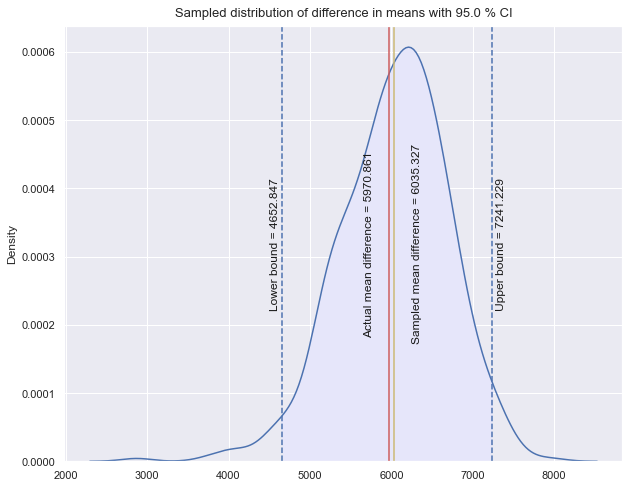

In [63]:
plot_mean_diff_conf_int(mean_diff, lcb, actual_mean_diff, ucb, color="k")

As we see after sampling 100 samples and plotting them, actual mean difference and sampled mean difference are close to each other as well as sampled confidence intervals and confidence intervals computed with ```diff_in_two_means_unpooled_ci``` function. These results let us make a conclusion that our results are quite robust. Now, let's also do a permutation test.

In [64]:
perm_diffs = [perm_test(own_income, rent_income) for _ in range(200)]

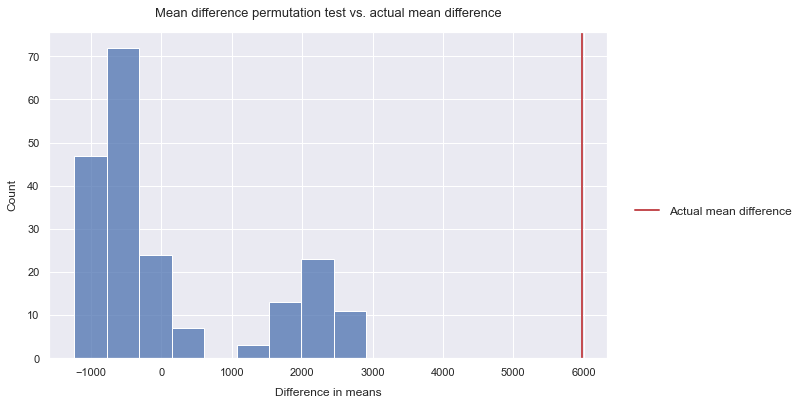

In [65]:
plot_perm_diffs(
    perm_diffs,
    actual_mean_diff,
    "Mean difference permutation test vs. actual mean difference",
)

We see from the chart, that actual mean difference lies far one the right side of distribution, confirming our earlier results of large ```t score``` and small ```p-value``` in our Hypothesis testing of difference in two means.

## **Machine Learning**<a name="ml"></a>

### Predicting whether loan application is going to be accepted

**Evaluation Metric**

As our classes are inbalanced, **accuracy** is not a good measure of model performance. We want to classify correctly all instances of **positive class** (clients application for a loan is accepted), that means we care about Recall as we don't want to miss on False Negative cases. Also we care about how precise we are in predicting a **positive class**. That means precision is also important for our model evaluation. That's why we choose a composite metric -  **F1 score** as our evaluation metric for this model. It's a harmonic mean between recall and precision scores.

**Preparing a data sets**

Removing features with big % of missing values, filtering features which have only one or two unique values in the whole data set and also removing the post loan approval features which may leak information.

In [66]:
cols_to_drop = accepted_df.columns[
    ((accepted_df.isnull().sum() / accepted_df.shape[0]) * 100 > 13).values
]
accepted_df = accepted_df.drop(cols_to_drop, axis=1)
cols_to_drop_2 = [
    "id",
    "funded_amnt",
    "funded_amnt_inv",
    "pymnt_plan",
    "url",
    "zip_code",
    "delinq_2yrs",
    "revol_bal",
    "initial_list_status",
    "out_prncp",
    "out_prncp_inv",
    "total_pymnt",
    "total_pymnt_inv",
    "total_rec_prncp",
    "total_rec_int",
    "total_rec_late_fee",
    "recoveries",
    "collection_recovery_fee",
    "last_pymnt_d",
    "last_pymnt_amnt",
    "last_credit_pull_d",
    "last_fico_range_high",
    "last_fico_range_low",
    "collections_12_mths_ex_med",
    "collection_recovery_fee",
    "policy_code",
    "acc_now_delinq",
    "chargeoff_within_12_mths",
    "delinq_amnt",
    "num_tl_120dpd_2m",
    "num_tl_30dpd",
    "num_tl_90g_dpd_24m",
    "pub_rec_bankruptcies",
    "tax_liens",
    "hardship_flag",
    "disbursement_method",
    "debt_settlement_flag",
]
accepted_df = accepted_df.drop(cols_to_drop_2, axis=1)

In [67]:
ml_cols = [
    "loan_amnt",
    "issue_d",
    "fico_range_low",
    "fico_range_high",
    "dti",
    "addr_state",
    "emp_length",
]
accepted_loans_ml = accepted_df.loc[:, ml_cols]
accepted_loans_ml["fico_score"] = (
    accepted_loans_ml["fico_range_low"] + accepted_loans_ml["fico_range_high"]
) / 2
accepted_loans_ml.drop(["fico_range_low", "fico_range_high"], axis=1, inplace=True)
accepted_loans_ml.rename(columns={"issue_d": "date"}, inplace=True)
accepted_loans_ml["accepted"] = 1

In [68]:
col_mapper = {
    "Amount Requested": "loan_amnt",
    "Application Date": "date",
    "Risk_Score": "fico_score",
    "Debt-To-Income Ratio": "dti",
    "State": "addr_state",
    "Employment Length": "emp_length",
}
rej_cols_drop = ["Loan Title", "Zip Code", "Policy Code"]
rejected_ml = rejected_df.drop(rej_cols_drop, axis=1)
rejected_ml.dropna(subset=["Risk_Score"], inplace=True)
rejected_ml.rename(columns=col_mapper, inplace=True)
rejected_ml['date'] = rejected_ml['date'].astype('str')
rejected_ml["dti"] = rejected_ml["dti"].replace("%", "", regex=True).astype("float")
rejected_ml["accepted"] = 0

In [69]:
full_data_loans = pd.concat([accepted_loans_ml, rejected_ml], ignore_index=True)
full_data_loans.replace(
    {
        key: value
        for (key, value) in states.items()
        if key in full_data_loans.addr_state.to_list()
    },
    inplace=True,
)

Let's remove instances where ```loan_amnt``` exceeds 40000 USD as it is the maximum loan amount ```LendingClub``` offers. If client asks for e.g. 100000 USD loan we do not know if 40000 will be sufficient for him, that's why for training a model we remove instances instead of automatically capping all applications over 40000 USD to maximum accepted limit.\
Also let's check for duplicates after merging data sets and remove them as we do not want model giving additional weights to repeating instances or duplicated instances appearing in both train and test sets.\
As there 514 missing values instances in ```dti``` feature, we are going to drop those instances as this feature is very sensitive and we do not want to impute values which might influence our model predictions.

In [70]:
full_data_loans = full_data_loans[full_data_loans["loan_amnt"] <= 40000]
full_data_loans.drop(
    full_data_loans[full_data_loans.duplicated() == True].index, inplace=True
)
full_data_loans.dropna(subset=['dti'], inplace=True)

In [71]:
data = full_data_loans.drop("accepted", axis=1)
target = full_data_loans['accepted'].copy()

In [72]:
target.value_counts()

0    3807774
1     443026
Name: accepted, dtype: int64

We see our classes are a heavily inbalanced, target class being a minority.

In [73]:
rnd = 42

In [74]:
full_train_data, full_test_data, full_train_target, full_test_target = train_test_split(
    data, target, stratify=target, random_state=rnd
)

In [75]:
full_data_loans.isnull().sum()

loan_amnt         0
date              0
dti               0
addr_state        0
emp_length    87580
fico_score        0
accepted          0
dtype: int64

Previously we saw ```emp_length``` feature contains missing values. As missing values size is not big compared with the size of whole data set, we can treat that those values are MCAR (Missing completely at random). Let's check if our assumption is true with ```missingno``` package.

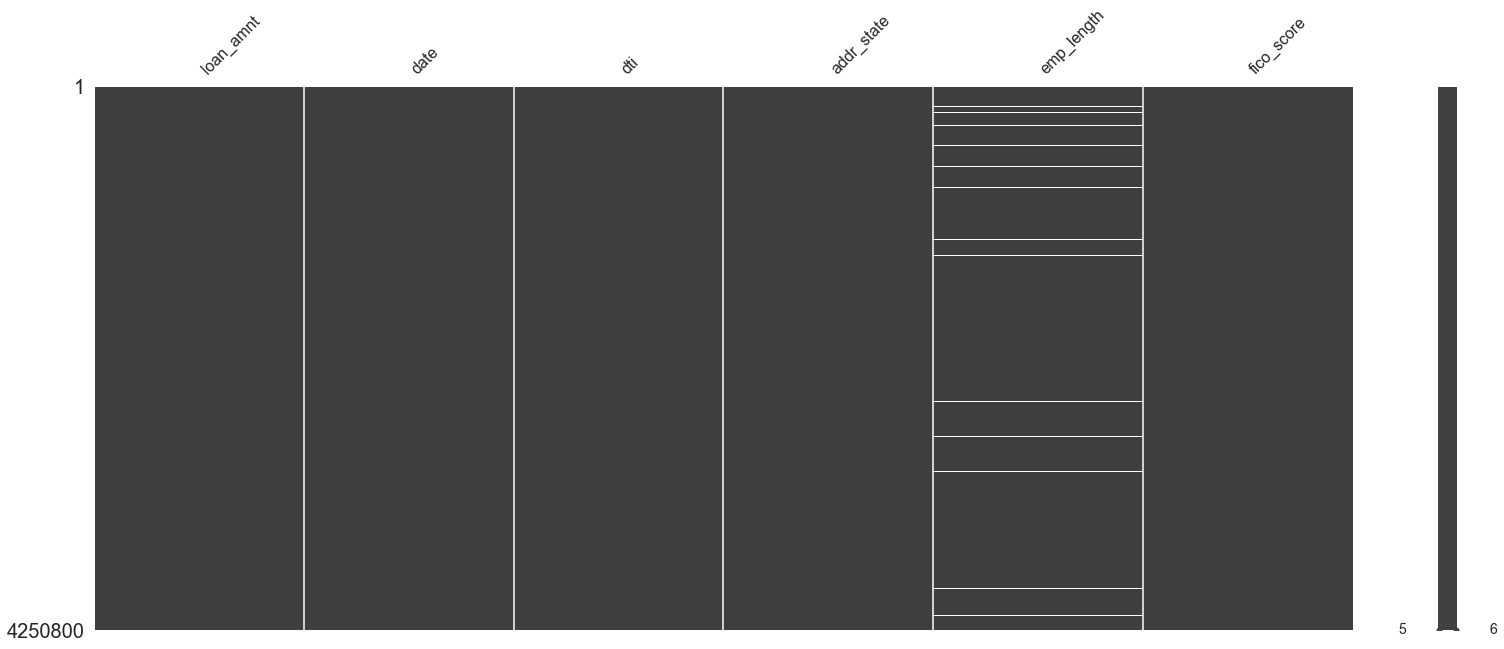

In [76]:
msno.matrix(data)

plt.show()

We see that missing values are scattered completely randomly in the dataset.

**Data pre-processing and feature engineering**

For pre-processing, feature engineering and model evaluation stages we are going to take a small amount of data to speed things up and later we are going to train and test final model on the whole data set.

In [77]:
idx_train = 40000
idx_test = 10000
min_train_data, min_test_data, min_train_target, min_test_target = (
    full_train_data.iloc[:idx_train, :],
    full_test_data.iloc[:idx_test, :],
    full_train_target.iloc[:idx_train],
    full_test_target.iloc[:idx_test],
)

In [78]:
dti_outlier_detect_transf = FunctionTransformer(
    percentile_outliers_detect, check_inverse=False
)
get_month_transf = FunctionTransformer(get_month, check_inverse=False)
cyclic_month_transf = FunctionTransformer(cyclic_month, check_inverse=False)
emp_lenght_missing_imp = FunctionTransformer(
    emp_length_missing_imputer, check_inverse=False
)
states_bin_transform = FunctionTransformer(states_binning, check_inverse=False)

After running pre-processing and feature engineering pipeline optimization with Optuna we came with a parameters bellow. We will use them to construct our final pipeline for modelling and model's hyper parameter optimization.

"scalers": "robust",\
"cat_encoders": "one_hot",\
"clustering": "KMeans",\
"num_of_clusters": 5,\
"kmeans_centroids": "KMeansCentroids",\
"log_reg_class_weights": None,

In [79]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=rnd)

In [80]:
num_columns = ["loan_amnt", "dti", "fico_score", "month_sin", "month_cos"]
cat_columns = ["emp_length", "state_region"]
num_columns_idx = list(range(len(num_columns)))

In [81]:
stateless_pipe = Pipeline(
    [
        ("dti_outlier", dti_outlier_detect_transf),
        ("get_month", get_month_transf),
        ("cyclic_month", cyclic_month_transf),
        ("empl_len", emp_lenght_missing_imp),
        ("state_binning", states_bin_transform),
    ]
)

num_pipe = Pipeline(
    [
        ("kmeans_labels", KmeansClustering(5, RobustScaler())),
        ("clustering_centroids", KmeansClusterDistance(5, RobustScaler())),
    ]
)
cat_pipe = Pipeline([("categorical_enc", OneHotEncoder(handle_unknown="ignore"))])

In [82]:
full_pipeline = Pipeline(
    [
        ("stateless_pipe", stateless_pipe),
        (
            "union",
            ColumnTransformer(
                [
                    ("numeric", num_pipe, num_columns),
                    ("categorical", cat_pipe, cat_columns),
                ]
            ),
        ),
    ],
)

In [83]:
min_train_data_tr = full_pipeline.fit_transform(min_train_data)

In [84]:
num_col_len = (
    len(num_columns)
    + len(
        full_pipeline.named_steps["union"]
        .transformers_[0][1]
        .named_steps["kmeans_labels"]
        .col_label
    )
    + len(
        full_pipeline.named_steps["union"]
        .transformers_[0][1]
        .named_steps["clustering_centroids"]
        .col_labels
    )
)
new_num_columns_idx = list(range(num_col_len))

In [85]:
log_r = LogisticRegression(random_state=rnd)
sgd_clf = SGDClassifier(random_state=rnd)
linear_svc = LinearSVC(random_state=42)
kernel_svc = SVC(random_state=42)
d_tree_clf = DecisionTreeClassifier(random_state=rnd)
xg_boost = XGBClassifier(verbosity=0, use_label_encoder=False, random_state=rnd)
light_gbm = LGBMClassifier(objective="binary", random_state=rnd)
cat_boost = CatBoostClassifier(
    iterations=100, loss_function="Logloss", verbose=0, random_state=rnd
)

clf_list = [
    log_r,
    sgd_clf,
    linear_svc,
    kernel_svc,
    d_tree_clf,
    xg_boost,
    light_gbm,
    cat_boost,
]

In [86]:
baseline_results = baseline_clfmodels_eval_cv(
    clf_list, min_train_data_tr, min_train_target, RobustScaler(), kf, new_num_columns_idx
)

In [87]:
baseline_results.style.background_gradient(axis=0).format(precision=3)

,Balanced accuracy,Accuracy,Precision,Recall,F1,Average precision,Roc auc,Total time in sec
Classifier,,,,,,,,
LogisticRegression,0.893,0.954,0.764,0.816,0.789,0.774,0.972,9.205
SGDClassifier,0.901,0.952,0.740,0.836,0.785,0.768,0.970,3.794
LinearSVC,0.902,0.953,0.749,0.836,0.790,0.775,0.971,35.926
SVC,0.908,0.953,0.741,0.850,0.792,0.774,0.969,503.124
DecisionTreeClassifier,0.889,0.959,0.805,0.802,0.803,0.666,0.889,8.844
XGBClassifier,0.941,0.981,0.923,0.891,0.906,0.945,0.994,88.048
LGBMClassifier,0.941,0.981,0.923,0.890,0.906,0.948,0.994,9.897
CatBoostClassifier,0.938,0.980,0.922,0.885,0.903,0.943,0.994,38.333


From our baseline results we see, that ensemble models did the best on our pre-processed and engineered data set. Our target metric - ```F1``` fluctuates between 0.79 and 0.9 which is very good result taking into account models hyper-parameters have not been tuned yet.\
We will choose quickests models - ```SGDClassifier``` and ```LGBM Classifier``` as our final data set is very big, we want fast performing models.

**Hyper Parameter Tuning**

Let's tune hyper parameter using Optuna - Bayesian optimization algorithm.

In [88]:
light_gbm_best_params = joblib.load("./optimized_params/light_gbm_best_params.pkl")
sgd_best_params = joblib.load("./optimized_params/sgd_best_params.pkl")

In [89]:
%%capture
light_gbm = LGBMClassifier(verbosity=-1, random_state=rnd, **light_gbm_best_params)
light_gbm_hp_results = light_gbm_hptuned_eval_cv(
    light_gbm, min_train_data_tr, min_train_target.values, RobustScaler(), kf, new_num_columns_idx,
)

In [90]:
sgd_clf = SGDClassifier(random_state=rnd, **sgd_best_params)
sgd_clf_hp_results = sgdclf_hptuned_eval_cv(
    sgd_clf,
    min_train_data_tr,
    min_train_target.values,
    RobustScaler(),
    kf,
    new_num_columns_idx,
)

In [91]:
final_results = pd.concat([light_gbm_hp_results, sgd_clf_hp_results])
final_results.style.background_gradient(axis=0).format(precision=3)

,Max numb of trees,Balanced accuracy,Accuracy,Precision,Recall,F1,Average precision,Roc auc,Total time in sec
Classifier,,,,,,,,,
LGBMClassifier,103.000,0.940,0.980,0.915,0.890,0.903,0.947,0.994,13.148
SGDClassifier,nan,0.895,0.954,0.760,0.821,0.789,0.770,0.971,4.976


Comparing baseline models with models after hyper parameter tuning, we see minimal increase in metrics, especially in ```F1``` score. It looks like default parameters were already a good match for this data set. We will see how these models perform on test data set and a whole data set too.

In [92]:
light_gbm.set_params(n_estimators=103)

LGBMClassifier(lambda_l1=0, lambda_l2=10, learning_rate=0.2943427792977012,
               max_depth=12, min_data_in_leaf=180,
               min_gain_to_split=0.23229386748340825, n_estimators=103,
               num_leaves=225, random_state=42, scale_pos_weight=1,
               verbosity=-1)

In [93]:
numeric_scaler = ColumnTransformer(
    [("numeric", RobustScaler(), new_num_columns_idx)], remainder="passthrough"
)
final_pipeline = Pipeline(
    [("full_pipeline", full_pipeline), ("numeric_scaler", numeric_scaler)]
)

In [94]:
min_train_data_tr = final_pipeline.fit_transform(min_train_data)
min_test_data_tr = final_pipeline.transform(min_test_data)

In [95]:
%%capture
results_hp_tuned_test = clfmodels_eval_test(
    [light_gbm, sgd_clf],
    min_train_data_tr,
    min_train_target,
    min_test_data_tr,
    min_test_target,
)

In [96]:
results_hp_tuned_test.style.background_gradient(axis=0).format(precision=3)

,Balanced accuracy,Accuracy,Precision,Recall,F1,Average precision,Roc auc,Total time in sec
Classifier,,,,,,,,
LGBMClassifier,0.939,0.979,0.906,0.888,0.896,0.941,0.994,0.386
SGDClassifier,0.873,0.951,0.746,0.776,0.761,0.755,0.970,0.142


We see that our models perform quite good on a test set and metric decrease is small compared with a train set. ```SGDClassifier``` even increased ```F1``` score on a test set.\
Let's plot confusion matrixes of models to see how they predict positive and negative class.

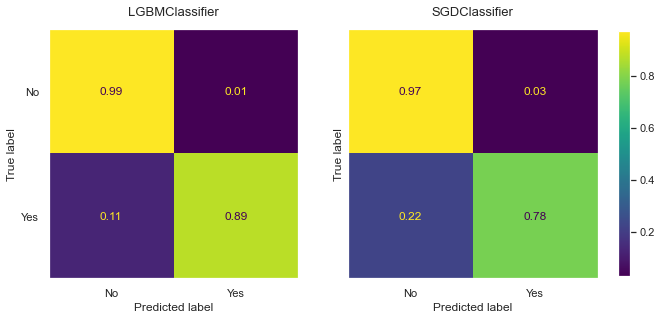

In [97]:
clf_list_2 = [light_gbm, sgd_clf]
plot_multi_cm(clf_list_2, min_test_data_tr, min_test_target, ['No', 'Yes'], 'viridis')

From confusion matrix we see more detail information how both  models predicted positive and negative class.\
```LGBM Classifier``` is doing pretty good job on predicting both classes, especially whether client is going to be rejected - **True Negative**. True Positives (Recall) for is 0.89 which is quite good taking into account that classes are inbalanced. \
```SGDClassifier``` - also did quite good job taking into account that it's not ensemble model.
Let's also plot Precision-Recall curve to check to see how threshold could be adjusted to get e.g. more recall while lowering precision, as our precision is higher than recall.

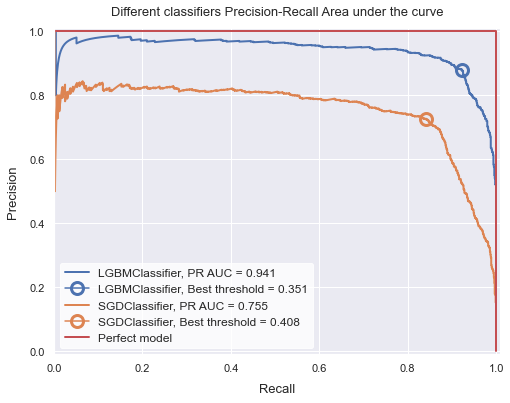

In [98]:
plot_pr_auc(
    clf_list_2,
    min_test_data_tr,
    min_test_target,
    ["LGBMClassifier", "SGDClassifier"],
    True
)

As we see from ```Precision-Recall``` plot, ```LGBClassifier``` has much higher ```precision``` and we could change threshold from ```f1 score``` optimal to orientated more for ```recall``` if decision makers decided that current model's ```recall``` is too low.\
```SGDClassifier``` has much lower ```precision``` and more less same ```recall``` is achieved with appr. 0.2 lower ```precision```.

**Training and testing classifiers on a whole data set.**

In [99]:
train_data_tr = final_pipeline.fit_transform(full_train_data)
test_data_tr = final_pipeline.transform(full_test_data)

In [100]:
%%capture
results_hp_tuned_full_data = clfmodels_eval_test(
    [light_gbm, sgd_clf], train_data_tr, full_train_target, test_data_tr, full_test_target,
)

In [101]:
results_hp_tuned_full_data.style.background_gradient(axis=0).format(precision=3)

,Balanced accuracy,Accuracy,Precision,Recall,F1,Average precision,Roc auc,Total time in sec
Classifier,,,,,,,,
LGBMClassifier,0.959,0.985,0.926,0.926,0.926,0.968,0.997,32.103
SGDClassifier,0.897,0.954,0.760,0.824,0.790,0.776,0.973,13.173


We see that bigger data set helped to increase ```F1``` score even more, especially for ```LGBClassifier```. Let's also check confusion matrix and Precision-Recall Plots for results.

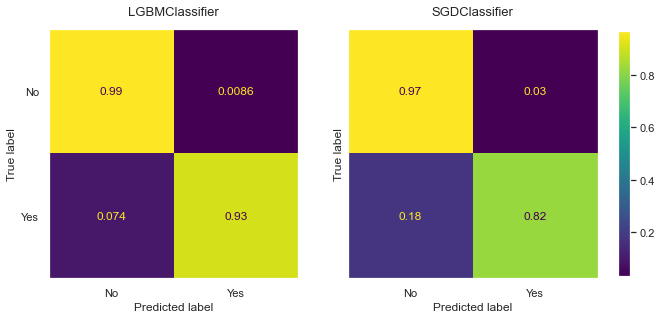

In [102]:
clf_list_2 = [light_gbm, sgd_clf]
plot_multi_cm(clf_list_2, test_data_tr, full_test_target, ["No", "Yes"], "viridis")

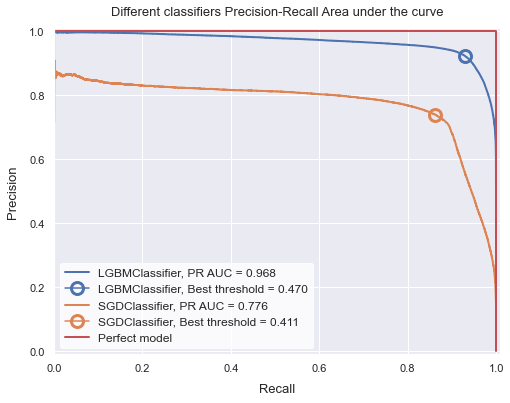

In [103]:
plot_pr_auc(
    clf_list_2,
    test_data_tr,
    full_test_target,
    ["LGBMClassifier", "SGDClassifier"],
    True,
)

We see that ```LGBMClassifier``` really shines with a big data set and ```Precision-Recall``` curve looks very good and close to ```Perfect``` model. ```SGDClassifier``` did not improve with big data set. Its ```PR AUC``` score is a little bit lower.\
Let's save our full pipeline and LightGBM model for web app.

**Analizing Features Importance**

In [104]:
one_hot_cat = (
    final_pipeline.named_steps["full_pipeline"]
    .named_steps["union"]
    .transformers_[1][1][0]
    .categories_
)
cat_columns_pipe = [
    f"{col}_{val}" for col, vals in zip(cat_columns, one_hot_cat) for val in vals
]
feature_names = (
    num_columns
    + final_pipeline.named_steps["full_pipeline"]
    .named_steps["union"]
    .transformers_[0][1][0]
    .col_label
    + final_pipeline.named_steps["full_pipeline"]
    .named_steps["union"]
    .transformers_[0][1][1]
    .col_labels
    + cat_columns_pipe
)

In [105]:
explainer = shap.TreeExplainer(light_gbm)
shap.initjs()

In [106]:
observation = test_data_tr[100].reshape(1, -1)
shap_values = explainer.shap_values(observation)
shap.force_plot(
    explainer.expected_value[1],
    shap_values[1],
    features=observation,
    feature_names=feature_names,
    link="logit",
)

Shap's library force plot breaks down a prediction to show the impact of each feature. ```LGBMClassifier``` predicted that this instance probability of getting a loans is almost 0. The ```base_value``` (the average model output based on provided data set) is ```0.00004693```.\
Feature values causing increased predictions are in red, and their visual size shows the magnitude of the feature's effect. Feature values decreasing the prediction are in blue. The biggest impact that pushes results towards negative ```accepted``` outcome comes from ```fico_score```, ```dti``` and ```emp_length_<1 year``` features. We see that this client application was rejected because of his/her ```fico_score``` and ```dti``` scores and also having ```less than 1 year employment length```.\
Let's also check what features impact positive outcome for client's application.

In [290]:
full_test_data.iloc[4040]

loan_amnt      20000.000
date          2017-08-01
dti               16.130
addr_state      Colorado
emp_length       2 years
fico_score       667.000
Name: 76520, dtype: object

In [107]:
observation = test_data_tr[4040].reshape(1, -1)
shap_values = explainer.shap_values(observation)
shap.force_plot(
    explainer.expected_value[1],
    shap_values[1],
    features=observation,
    feature_names=feature_names,
    link="logit",
)

Again we see that for ```positive``` outcome ```fico_score``` and ```emp_length_<1 year``` features. Client's application for a loan was accepted because of his/her ```fico_score``` and having ```employment length``` equal or greater that 1 year.

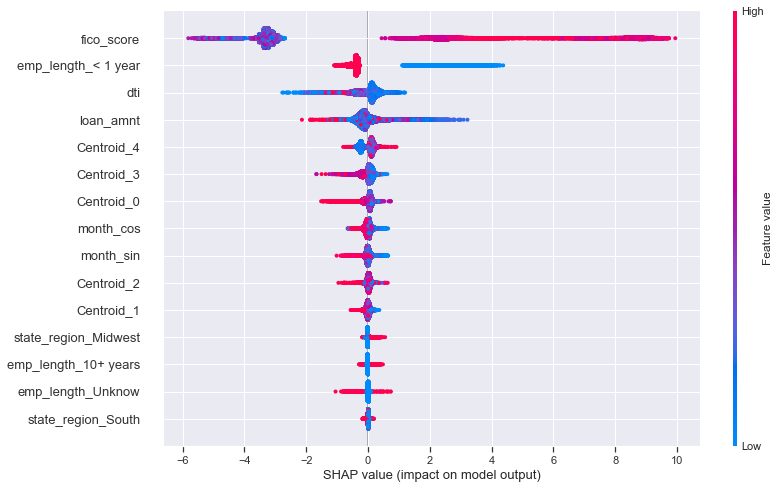

In [108]:
shap_values = explainer.shap_values(test_data_tr[:50000])
shap.summary_plot(
    shap_values[1],
    test_data_tr[:50000],
    feature_names=feature_names,
    max_display=15,
    plot_size=(12, 8),
)

Shap's ```summary_plot``` gives an overview on feature importance from test data set. Shap values are displayed on x axis in log odds scale. We see that high ```fico_score``` values contribute to loan being ```accepted```. Which makes sense, because higher values mean better client's financial record.\
Being employed for a year or longer also contributes to the positive outcome of getting loan.\
```loan_amnt``` is also important feature, though its values are not so strictly separated. We see lower and higher values on both rejected and accepted sides.
```dti``` feature interpretation is quite clear - smaller ```Debt to Income ratio``` contributes in increased probability of getting a loan, although we see some small values of ```dti``` feature in rejected loan side too.

### Predicting loan's grade

**Evaluation Metric**

Predicting a loans ```grade``` is multiclass classification problem. We are going again to use ```F1``` score, but in this case we are going to use **F1 macro** score which is a simple arithmetic mean of all metrics across classes. This technique gives equal weights to all classes and because we care about all classes equally it's  a good option to evaluate models.

**Preparing a data set**

Removing high cardinality features and features which may leak information. 

In [109]:
grade_cols_drop = ["sub_grade", "loan_status", "purpose", "emp_title", "int_rate", "installment"]
loan_grade_ml = accepted_df.drop(grade_cols_drop, axis=1)
loan_grade_ml = loan_grade_ml[
    loan_grade_ml["home_ownership"].isin(["OWN", "RENT", "MORTGAGE"])
]

In [110]:
loan_grade_ml.head()

,loan_amnt,term,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,title,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,application_type,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
528963,12000.000,36 months,A,10+ years,OWN,42000.000,Source Verified,2017-09-01,Debt consolidation,CA,27.740,Jun-1996,715.000,719.000,0.000,9.000,1.000,37.000,16.000,Individual,0.000,30502.000,1.000,2.000,1.000,3.000,8.000,19045.000,2.000,4.000,7117.000,53.000,31000.000,1.000,1.000,2.000,7.000,3389.000,7144.000,53.900,131.000,255.000,1.000,1.000,0.000,14.000,8.000,0.000,2.000,6.000,2.000,2.000,7.000,7.000,9.000,6.000,9.000,3.000,100.000,0.000,57180.000,30502.000,15500.000,26180.000
528964,16000.000,36 months,A,5 years,RENT,79077.000,Not Verified,2017-09-01,Debt consolidation,VA,15.940,Jun-2000,700.000,704.000,0.000,12.000,0.000,57.700,20.000,Individual,0.000,128572.000,0.000,1.000,0.000,0.000,38.000,112355.000,0.000,0.000,2959.000,58.000,28100.000,0.000,0.000,0.000,0.000,10714.000,336.000,90.900,145.000,207.000,32.000,32.000,0.000,206.000,NaN,2.000,2.000,11.000,2.000,2.000,9.000,11.000,11.000,11.000,12.000,0.000,78.900,100.000,125018.000,128572.000,3700.000,96918.000
528965,33000.000,36 months,A,< 1 year,MORTGAGE,107000.000,Verified,2017-09-01,Debt consolidation,TX,19.060,Dec-2005,785.000,789.000,0.000,25.000,0.000,16.100,52.000,Joint App,0.000,244459.000,2.000,2.000,0.000,0.000,46.000,29686.000,3.000,6.000,9317.000,22.000,115000.000,0.000,1.000,0.000,6.000,9778.000,65368.000,20.000,141.000,133.000,5.000,5.000,2.000,6.000,19.000,0.000,4.000,10.000,10.000,19.000,12.000,22.000,38.000,10.000,25.000,3.000,100.000,0.000,404510.000,48219.000,81700.000,73015.000
528966,32000.000,36 months,B,10+ years,MORTGAGE,155000.000,Source Verified,2017-09-01,Credit card refinancing,NJ,12.350,Sep-2005,715.000,719.000,1.000,20.000,0.000,34.100,42.000,Individual,0.000,405751.000,2.000,1.000,1.000,1.000,8.000,15582.000,4.000,7.000,14049.000,40.000,142600.000,0.000,2.000,2.000,8.000,22542.000,81313.000,34.500,91.000,144.000,1.000,1.000,3.000,1.000,1.000,0.000,7.000,10.000,12.000,27.000,3.000,18.000,36.000,10.000,20.000,5.000,94.900,0.000,527034.000,63891.000,124200.000,20034.000
528967,40000.000,60 months,C,9 years,MORTGAGE,120000.000,Verified,2017-09-01,Debt consolidation,TX,31.110,Apr-2002,765.000,769.000,0.000,12.000,0.000,20.700,26.000,Individual,0.000,227506.000,2.000,3.000,2.000,4.000,3.000,140872.000,0.000,0.000,10609.000,22.000,64600.000,2.000,3.000,1.000,4.000,20682.000,51211.000,20.700,122.000,185.000,26.000,3.000,4.000,26.000,11.000,0.000,4.000,4.000,6.000,8.000,9.000,7.000,13.000,4.000,12.000,2.000,100.000,0.000,367745.000,154261.000,64600.000,168145.000


As we have 66 features still left, we need to to do feature selection and pick-up most representative feature to predict loan ```grade```. We did ```Mutual Information``` and ```Shap feature importance``` tests and results provided that following features do not have high predicting power.

In [111]:
mi_scores = make_mi_scores(loan_grade_ml[:20000], "grade", "classification")
shap_feat_importance = get_shap_feature_names(loan_grade_ml[:20000], sgd_clf, "grade")
mi_shap_results = pd.merge(
    shap_feat_importance,
    pd.DataFrame(mi_scores).reset_index(),
    left_on="col_name",
    right_on="index",
).drop("index", 1)

In [112]:
low_power_features = mi_shap_results.sort_values(
    by=(["feature_importance_value", "mi_scores"]), ascending=[True, True]
)[:28].col_name.values
low_power_features = [
    feat for feat in low_power_features if feat not in ["term", "emp_length"]
]
loan_grade_ml = loan_grade_ml.drop(low_power_features, axis=1)

In [113]:
loan_grade_ml["fico_score"] = (
    loan_grade_ml["fico_range_low"] + loan_grade_ml["fico_range_high"]
) / 2
loan_grade_ml.drop(["fico_range_low", "fico_range_high"], axis=1, inplace=True)
loan_grade_ml.replace(
    {
        key: value
        for (key, value) in states.items()
        if key in loan_grade_ml.addr_state.to_list()
    },
    inplace=True,
)
loan_grade_ml.dropna(subset=["dti"], inplace=True)

In [114]:
grade_data = loan_grade_ml.drop("grade", axis=1)
grade_target = loan_grade_ml['grade'].copy()

In [115]:
grade_target.value_counts()

C    144829
B    132877
A     78668
D     56498
E     20125
F      6222
G      3447
Name: grade, dtype: int64

We see that ```F``` and ```G``` loan grade classes have quite small number of instances compared with other grade classes.

In [116]:
(
    full_train_data_grade,
    full_test_data_grade,
    full_train_target_grade,
    full_test_target_grade,
) = train_test_split(grade_data, grade_target, stratify=grade_target, random_state=rnd)

In [117]:
grade_data.isnull().sum()[grade_data.isnull().sum() > 0]

emp_length               31361
revol_util                 442
mths_since_rcnt_il       13078
all_util                    67
avg_cur_bal                 18
bc_open_to_buy            5725
bc_util                   5928
mo_sin_old_il_acct       13078
mths_since_recent_bc      5414
mths_since_recent_inq    51803
percent_bc_gt_75          5740
dtype: int64

We see that some features contain missing values. As missing values size is not big compared with the size of whole data set, we can treat that those values are MCAR (Missing completely at random). Let's check if our assumption is true with ```missingno``` package.

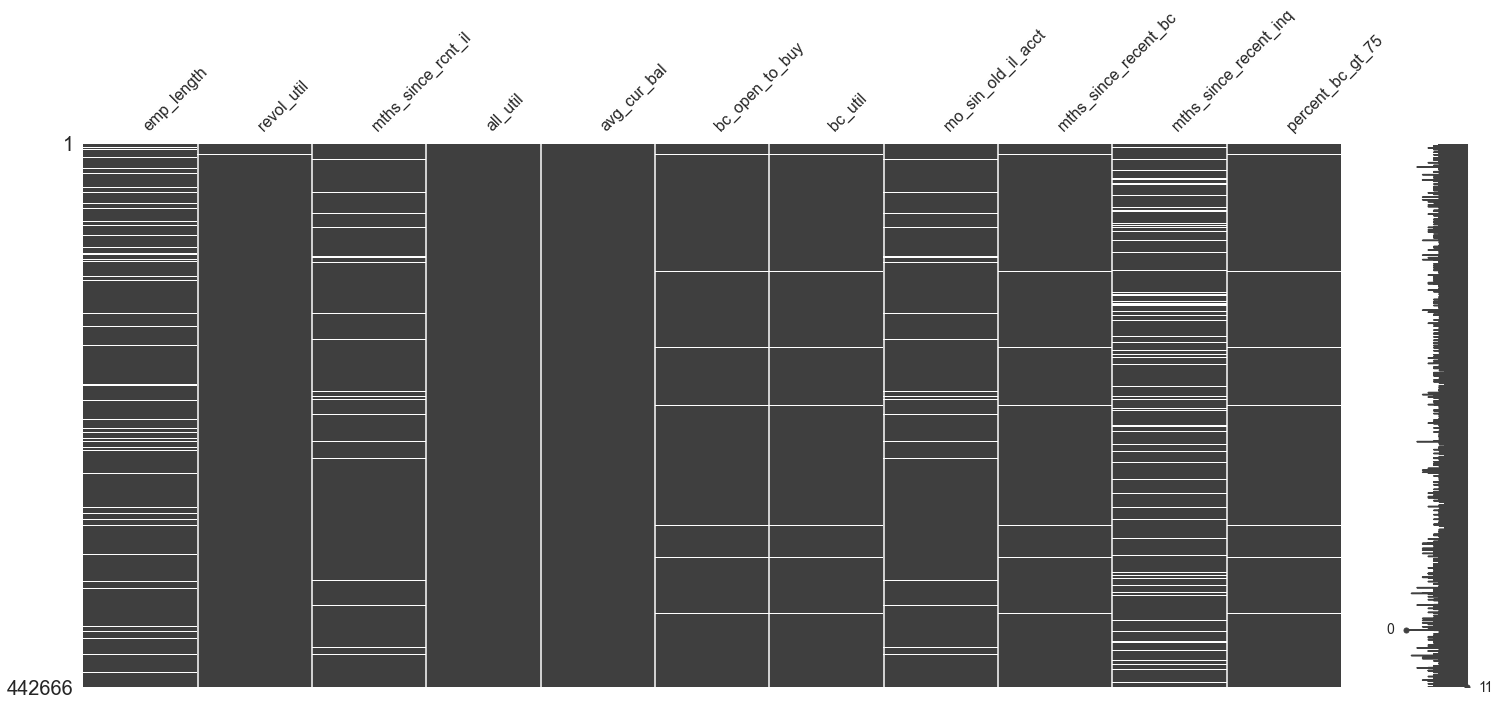

In [118]:
msno.matrix(
    grade_data[grade_data.isnull().sum()[grade_data.isnull().sum() > 0].index.to_list()]
)

plt.show()

We see that missing values are scattered completely randomly in the dataset.

**Data pre-processing and feature engineering**

For pre-processing, feature engineering and model evaluation stages we are going to take a small amount of data to speed things up and later we are going to train and test final model on the whole data set.

In [119]:
(
    min_train_data_grade,
    min_test_data_grade,
    min_train_target_grade,
    min_test_target_grade,
) = (
    full_train_data_grade.iloc[:idx_train, :],
    full_test_data_grade.iloc[:idx_test, :],
    full_train_target_grade.iloc[:idx_train],
    full_test_target_grade.iloc[:idx_test],
)

In [120]:
annual_inc_cap = FunctionTransformer(annual_inc_outliers_detect, check_inverse=False)
dti_outlier_detect_transf = FunctionTransformer(
    percentile_outliers_detect, check_inverse=False
)
get_cr_month_year = FunctionTransformer(
    get_earliest_cr_line_month_year, check_inverse=False
)
cyclic_cr_line_month = FunctionTransformer(
    cyclic_earliest_cr_line_month, check_inverse=False
)
emp_lenght_missing_imp = FunctionTransformer(
    emp_length_missing_imputer, check_inverse=False
)
states_bin_transform = FunctionTransformer(states_binning, check_inverse=False)

After running pre-processing and feature engineering pipeline optimization with Optuna we came with a parameters bellow. We will use them to construc our final pipeline for modelling and model's hyper parameter optimization.

'scalers': 'standard',\
'cat_encoders': 'one_hot',\
'log_reg_class_weights': 'balanced'

In [121]:
num_columns = [
    "loan_amnt",
    "annual_inc",
    "dti",
    "open_acc",
    "revol_util",
    "total_acc",
    "tot_coll_amt",
    "tot_cur_bal",
    "mths_since_rcnt_il",
    "total_bal_il",
    "max_bal_bc",
    "all_util",
    "total_rev_hi_lim",
    "avg_cur_bal",
    "bc_open_to_buy",
    "bc_util",
    "mo_sin_old_il_acct",
    "mo_sin_old_rev_tl_op",
    "mo_sin_rcnt_rev_tl_op",
    "mo_sin_rcnt_tl",
    "mths_since_recent_bc",
    "mths_since_recent_inq",
    "num_op_rev_tl",
    "num_rev_accts",
    "num_sats",
    "pct_tl_nvr_dlq",
    "percent_bc_gt_75",
    "tot_hi_cred_lim",
    "total_bal_ex_mort",
    "total_bc_limit",
    "total_il_high_credit_limit",
    "fico_score",
    "earliest_cr_line_year",
    "cr_line_month_sin",
    "cr_line_month_cos",
]
cat_columns = ["term", "emp_length", "state_region"]
num_columns_idx = list(range(len(num_columns)))

In [122]:
stateless_pipe_grade = Pipeline(
    [
        ("annual_inc_outlier", annual_inc_cap),
        ("dti_outlier", dti_outlier_detect_transf),
        ("get_month", get_cr_month_year),
        ("cyclic_month", cyclic_cr_line_month),
        ("empl_len", emp_lenght_missing_imp),
        ("state_binning", states_bin_transform),
    ]
)

num_pipe = Pipeline([("numeric_inputer", SimpleImputer(strategy="median"))])
cat_pipe = Pipeline([("categorical_enc", OneHotEncoder(handle_unknown="ignore"))])

In [123]:
full_pipeline = Pipeline(
    [
        ("stateless_pipe", stateless_pipe_grade),
        (
            "union",
            ColumnTransformer(
                [
                    ("numeric", num_pipe, num_columns),
                    ("categorical", cat_pipe, cat_columns),
                ]
            ),
        ),
    ],
)

In [124]:
min_train_data_grade_tr = full_pipeline.fit_transform(min_train_data_grade)

In [125]:
log_r = LogisticRegression(random_state=rnd)
sgd_clf = SGDClassifier(random_state=rnd)
d_tree_clf = DecisionTreeClassifier(random_state=rnd)
light_gbm = LGBMClassifier(objective="multiclass", num_class=7, random_state=rnd)

clf_list_grade = [
    log_r,
    sgd_clf,
    d_tree_clf,
    light_gbm,
]

In [126]:
baseline_results = baseline_clfmodels_eval_cv(
    clf_list_grade,
    min_train_data_grade_tr,
    min_train_target_grade,
    StandardScaler(),
    kf,
    num_columns_idx,
    "macro"
)

In [127]:
baseline_results.style.background_gradient(axis=0).format(precision=3)

,Balanced accuracy,Accuracy,F1 macro,Total time in sec
Classifier,,,,
LogisticRegression,0.261,0.486,0.246,29.589
SGDClassifier,0.247,0.429,0.225,36.397
DecisionTreeClassifier,0.247,0.376,0.247,21.450
LGBMClassifier,0.293,0.501,0.294,39.317


We narrowed down our classifiers list because data set has higher dimensionality than ```accepted\rejected classification``` problem data set. We see that although ```LGBMClassifier``` is not a fastest but results are the best from this model. Our target metric - ```F1 macro``` score is **0.294** which is pretty low result. Let's do  hyper-parameter tuning and check if it will help to get better results.

**Hyper Parameter Tuning**

In [128]:
light_gbm_best_params_grade = joblib.load(
    "./optimized_params/light_gbm_best_params_grade.pkl"
)

In [129]:
%%capture
light_gbm_grade = LGBMClassifier(
    verbosity=-1, random_state=rnd, **light_gbm_best_params_grade
)
light_gbm_hp_results_grade = light_gbm_hptuned_eval_cv(
    light_gbm_grade,
    min_train_data_grade_tr,
    min_train_target_grade.values,
    StandardScaler(),
    kf,
    num_columns_idx,
    "macro",
)

In [130]:
light_gbm_hp_results_grade.style.background_gradient(axis=0).format(precision=3)

,Max numb of trees,Balanced accuracy,Accuracy,F1 macro,Total time in sec
Classifier,,,,,
LGBMClassifier,40,0.290,0.505,0.289,33.686


We see that hyper-parameter tuning did not help. Looks like our features do not have enough predicting power or classes are too inbalanced and model cannot find patterns to predict a loan grade with at least descent ```F1 macro``` results.

In [131]:
light_gbm_grade.set_params(n_estimators=40)

LGBMClassifier(lambda_l1=2, lambda_l2=13, learning_rate=0.27610021201679397,
               max_depth=15, min_data_in_leaf=90,
               min_gain_to_split=0.3937871541134091, n_estimators=40,
               num_leaves=20, random_state=42, scale_pos_weight=94,
               verbosity=-1)

In [132]:
numeric_scaler = ColumnTransformer(
    [("numeric", StandardScaler(), num_columns_idx)], remainder="passthrough"
)
final_pipeline = Pipeline(
    [("full_pipeline", full_pipeline), ("numeric_scaler", numeric_scaler)]
)

In [133]:
min_train_data_grade_tr = final_pipeline.fit_transform(min_train_data_grade)
min_test_data_grade_tr = final_pipeline.transform(min_test_data_grade)

In [134]:
%%capture
results_hp_tuned_test_grade = clfmodels_eval_test(
    [light_gbm_grade],
    min_train_data_grade_tr,
    min_train_target_grade,
    min_test_data_grade_tr,
    min_test_target_grade,
    "macro",
)

In [135]:
results_hp_tuned_test_grade.style.background_gradient(axis=0).format(precision=3)

,Balanced accuracy,Accuracy,F1 macro,Total time in sec
Classifier,,,,
LGBMClassifier,0.283,0.502,0.277,1.232


On a test set results are almost similar to our cross-validated results from train set.\
Let's plot confusion matrixes of model to see how it predicted separate loan grade classes.

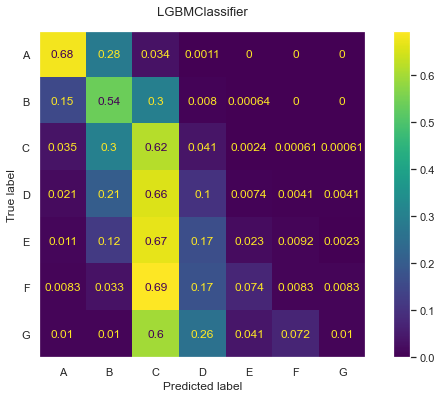

In [136]:
plot_cm(
    min_test_target_grade,
    light_gbm_grade.predict(min_test_data_grade_tr),
    sorted(min_train_target_grade.unique()),
    "viridis",
    "True",
    "LGBMClassifier",
)

In [137]:
print(classification_report(
    min_test_target_grade, light_gbm_grade.predict(min_test_data_grade_tr),
))

              precision    recall  f1-score   support

           A       0.66      0.68      0.67      1750
           B       0.48      0.54      0.51      3106
           C       0.48      0.62      0.54      3276
           D       0.30      0.10      0.15      1214
           E       0.24      0.02      0.04       436
           F       0.05      0.01      0.01       121
           G       0.10      0.01      0.02        97

    accuracy                           0.50     10000
   macro avg       0.33      0.28      0.28     10000
weighted avg       0.47      0.50      0.47     10000



Indeed we see, that classes which have more instances were predicted better and their ```F1 score``` is quite descent. Exception is ```D``` class which have similar instances in a test set as ```A``` class but its ```F1 score``` is just **0.15**.

**Training and testing classifiers on a whole data set.**

In [138]:
full_train_data_grade_tr = final_pipeline.fit_transform(full_train_data_grade)
full_test_data_grade_tr = final_pipeline.transform(full_test_data_grade)

In [139]:
%%capture
results_hp_tuned_full_data_grade = clfmodels_eval_test(
    [light_gbm_grade],
    full_train_data_grade_tr,
    full_train_target_grade,
    full_test_data_grade_tr,
    full_test_target_grade,
    "macro"
)

In [140]:
results_hp_tuned_full_data_grade.style.background_gradient(axis=0).format(precision=3)

,Balanced accuracy,Accuracy,F1 macro,Total time in sec
Classifier,,,,
LGBMClassifier,0.291,0.515,0.286,9.446


A full dat set did help, but not by much.

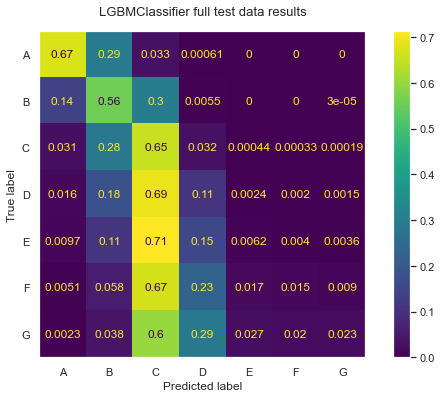

In [141]:
plot_cm(
    full_test_target_grade,
    light_gbm_grade.predict(full_test_data_grade_tr),
    sorted(min_train_target_grade.unique()),
    "viridis",
    "True",
    "LGBMClassifier full test data results",
)

In [142]:
print(classification_report(
    full_test_target_grade, light_gbm_grade.predict(full_test_data_grade_tr),
))

              precision    recall  f1-score   support

           A       0.69      0.67      0.68     19667
           B       0.49      0.56      0.52     33219
           C       0.48      0.65      0.55     36207
           D       0.36      0.11      0.16     14125
           E       0.24      0.01      0.01      5031
           F       0.23      0.01      0.03      1556
           G       0.25      0.02      0.04       862

    accuracy                           0.52    110667
   macro avg       0.39      0.29      0.29    110667
weighted avg       0.49      0.52      0.48    110667



We see increase in ```F1``` metric, but ```D```, ```E```, ```F```, ```G``` classes are still represented poorly.

Let's save our full pipeline and LightGBM model for web app.

**Analizing Features Importance**

In [143]:
one_hot_cat = (
    final_pipeline.named_steps["full_pipeline"]
    .named_steps["union"]
    .transformers_[1][1][0]
    .categories_
)
cat_columns_pipe = [
    f"{col}_{val.strip()}"
    for col, vals in zip(cat_columns, one_hot_cat)
    for val in vals
]
feature_names = num_columns + cat_columns_pipe

In [144]:
explainer = shap.TreeExplainer(light_gbm_grade)

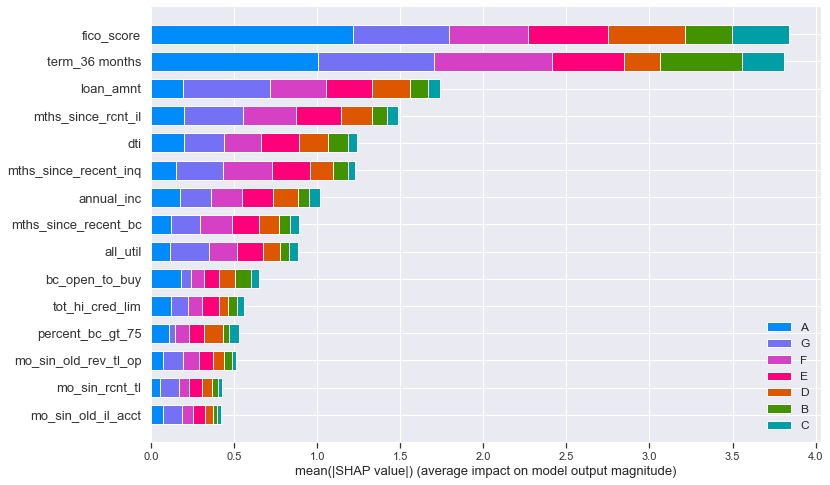

In [145]:
shap_values = explainer.shap_values(full_test_data_grade_tr[:40000])
shap.summary_plot(
    shap_values,
    full_test_data_grade_tr[:40000],
    feature_names=feature_names,
    class_names=np.unique(full_test_target_grade),
    max_display=15,
    plot_size=(12, 8),
)

We see top 15 feature importance for each loan grade class. We can also see that same feature magnitute on model output differs from class to class. Mostl influencal features are: ```36 month loan term```, ```fico score``` and ```loan amnt```. 

### Predicting loan's subgrade

**Evaluation Metric**

We are going to use **F1 macro** score again. We will make 7 models - one for each grade, to predict 5 ```subgrade``` classes. Also, as we care about all subgrade classes equally - ```F1 macro``` metrics again suits our goal.

**Preparing a data set**

Removing high cardinality features and features which may leak information.

In [146]:
grade_cols_drop = ["loan_status", "purpose", "emp_title", "int_rate", "installment"]
loan_subgrade_ml = accepted_df.drop(grade_cols_drop, axis=1)
loan_subgrade_ml = loan_subgrade_ml[
    loan_subgrade_ml["home_ownership"].isin(["OWN", "RENT", "MORTGAGE"])
]

In [147]:
loan_subgrade_ml.head()

,loan_amnt,term,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,title,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,application_type,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
528963,12000.000,36 months,A,A5,10+ years,OWN,42000.000,Source Verified,2017-09-01,Debt consolidation,CA,27.740,Jun-1996,715.000,719.000,0.000,9.000,1.000,37.000,16.000,Individual,0.000,30502.000,1.000,2.000,1.000,3.000,8.000,19045.000,2.000,4.000,7117.000,53.000,31000.000,1.000,1.000,2.000,7.000,3389.000,7144.000,53.900,131.000,255.000,1.000,1.000,0.000,14.000,8.000,0.000,2.000,6.000,2.000,2.000,7.000,7.000,9.000,6.000,9.000,3.000,100.000,0.000,57180.000,30502.000,15500.000,26180.000
528964,16000.000,36 months,A,A5,5 years,RENT,79077.000,Not Verified,2017-09-01,Debt consolidation,VA,15.940,Jun-2000,700.000,704.000,0.000,12.000,0.000,57.700,20.000,Individual,0.000,128572.000,0.000,1.000,0.000,0.000,38.000,112355.000,0.000,0.000,2959.000,58.000,28100.000,0.000,0.000,0.000,0.000,10714.000,336.000,90.900,145.000,207.000,32.000,32.000,0.000,206.000,NaN,2.000,2.000,11.000,2.000,2.000,9.000,11.000,11.000,11.000,12.000,0.000,78.900,100.000,125018.000,128572.000,3700.000,96918.000
528965,33000.000,36 months,A,A3,< 1 year,MORTGAGE,107000.000,Verified,2017-09-01,Debt consolidation,TX,19.060,Dec-2005,785.000,789.000,0.000,25.000,0.000,16.100,52.000,Joint App,0.000,244459.000,2.000,2.000,0.000,0.000,46.000,29686.000,3.000,6.000,9317.000,22.000,115000.000,0.000,1.000,0.000,6.000,9778.000,65368.000,20.000,141.000,133.000,5.000,5.000,2.000,6.000,19.000,0.000,4.000,10.000,10.000,19.000,12.000,22.000,38.000,10.000,25.000,3.000,100.000,0.000,404510.000,48219.000,81700.000,73015.000
528966,32000.000,36 months,B,B5,10+ years,MORTGAGE,155000.000,Source Verified,2017-09-01,Credit card refinancing,NJ,12.350,Sep-2005,715.000,719.000,1.000,20.000,0.000,34.100,42.000,Individual,0.000,405751.000,2.000,1.000,1.000,1.000,8.000,15582.000,4.000,7.000,14049.000,40.000,142600.000,0.000,2.000,2.000,8.000,22542.000,81313.000,34.500,91.000,144.000,1.000,1.000,3.000,1.000,1.000,0.000,7.000,10.000,12.000,27.000,3.000,18.000,36.000,10.000,20.000,5.000,94.900,0.000,527034.000,63891.000,124200.000,20034.000
528967,40000.000,60 months,C,C4,9 years,MORTGAGE,120000.000,Verified,2017-09-01,Debt consolidation,TX,31.110,Apr-2002,765.000,769.000,0.000,12.000,0.000,20.700,26.000,Individual,0.000,227506.000,2.000,3.000,2.000,4.000,3.000,140872.000,0.000,0.000,10609.000,22.000,64600.000,2.000,3.000,1.000,4.000,20682.000,51211.000,20.700,122.000,185.000,26.000,3.000,4.000,26.000,11.000,0.000,4.000,4.000,6.000,8.000,9.000,7.000,13.000,4.000,12.000,2.000,100.000,0.000,367745.000,154261.000,64600.000,168145.000


In [148]:
mi_scores = make_mi_scores(loan_subgrade_ml[:20000], "sub_grade", "classification")
shap_feat_importance = get_shap_feature_names(loan_subgrade_ml[:20000], sgd_clf, "sub_grade")
mi_shap_results = pd.merge(
    shap_feat_importance,
    pd.DataFrame(mi_scores).reset_index(),
    left_on="col_name",
    right_on="index",
).drop("index", 1)

In [149]:
low_power_features = mi_shap_results.sort_values(
    by=(["feature_importance_value", "mi_scores"]), ascending=[True, True]
)[:28].col_name.values
low_power_features = [
    feat for feat in low_power_features if feat not in ["term", "emp_length", "grade"]
]
loan_subgrade_ml = loan_subgrade_ml.drop(low_power_features, axis=1)

loan_subgrade_ml["fico_score"] = (
    loan_subgrade_ml["fico_range_low"] + loan_subgrade_ml["fico_range_high"]
) / 2
loan_subgrade_ml.drop(["fico_range_low", "fico_range_high"], axis=1, inplace=True)
loan_subgrade_ml.replace(
    {
        key: value
        for (key, value) in states.items()
        if key in loan_subgrade_ml.addr_state.to_list()
    },
    inplace=True,
)
loan_subgrade_ml.dropna(subset=["dti"], inplace=True)

**Data pre-processing and feature engineering**

We are going to use a full train set as our classes are highly inbalanced and same numerical and categorical encoders as for grade pipeline.

In [150]:
cat_columns = ["term", "emp_length", "state_region"]
num_columns_idx = list(range(len(num_columns)))

In [151]:
stateless_pipe_subgrade = Pipeline(
    [
        ("annual_inc_outlier", annual_inc_cap),
        ("dti_outlier", dti_outlier_detect_transf),
        ("get_month", get_cr_month_year),
        ("cyclic_month", cyclic_cr_line_month),
        ("empl_len", emp_lenght_missing_imp),
        ("state_binning", states_bin_transform),
    ]
)

num_pipe_subgrade = Pipeline([("numeric_inputer", SimpleImputer(strategy="median"))])

full_pipeline_subgrade = Pipeline(
    [
        ("stateless_pipe", stateless_pipe_subgrade),
        (
            "union",
            ColumnTransformer(
                [
                    ("numeric", num_pipe_subgrade, num_columns),
                    (
                        "one_hot_enc",
                        OneHotEncoder(handle_unknown="ignore"),
                        cat_columns,
                    ),
                ]
            ),
        ),
    ],
)
final_pipeline_subgrade = Pipeline(
    [("full_pipeline", full_pipeline_subgrade), ("numeric_scaler", numeric_scaler)]
)

In [152]:
models_dict = {}
for grade in sorted(loan_subgrade_ml.grade.unique()):
    models_dict[f"Grade_{grade}_subgrade_model_and_results"] = subgrade_models(
        loan_subgrade_ml, final_pipeline_subgrade, grade
    )

In [153]:
for number, item in enumerate(models_dict.items()):
    if number == 0:
        final_table_subgrade = models_dict[item[0]][0]
        final_table_subgrade = final_table_subgrade.rename(index={"LGBMClassifier": item[0]})
    else:
        temp_df = models_dict[item[0]][0]
        temp_df = temp_df.rename(index={"LGBMClassifier": item[0]})
        final_table_subgrade = pd.concat([final_table_subgrade, temp_df])

In [154]:
final_table_subgrade.style.background_gradient(axis=0).format(precision=3)

,Balanced accuracy,Accuracy,F1 macro,Total time in sec
Classifier,,,,
Grade_A_subgrade_model_and_results,0.351,0.377,0.321,2.628
Grade_B_subgrade_model_and_results,0.278,0.297,0.241,4.119
Grade_C_subgrade_model_and_results,0.259,0.272,0.229,5.625
Grade_D_subgrade_model_and_results,0.237,0.278,0.211,2.207
Grade_E_subgrade_model_and_results,0.272,0.292,0.259,1.458
Grade_F_subgrade_model_and_results,0.237,0.278,0.228,0.708
Grade_G_subgrade_model_and_results,0.233,0.259,0.228,0.767


```F1``` score variates between 0.21 and 0.32 depending on grade class, but we do not see such a big difference like in predicting loan grade, where several classes had relatively good ```F1``` (over 0.50) and other classes has only 0.03 and similar ```F1``` score.

### Predicting loan's interest rate

**Evaluation Metric**

As our target is continues values, we are going to use a regression and our metric will be ```RMSE```.

**Preparing a data set**

Removing high cardinality features and features which may leak information.

In [155]:
grade_cols_drop = ["loan_status", "purpose", "emp_title", "installment"]
loan_intrate_ml = accepted_df.drop(grade_cols_drop, axis=1)
loan_intrate_ml = loan_intrate_ml[
    loan_intrate_ml["home_ownership"].isin(["OWN", "RENT", "MORTGAGE"])
]

In [156]:
loan_intrate_ml.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,title,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,application_type,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
528963,12000.000,36 months,7.970,A,A5,10+ years,OWN,42000.000,Source Verified,2017-09-01,Debt consolidation,CA,27.740,Jun-1996,715.000,719.000,0.000,9.000,1.000,37.000,16.000,Individual,0.000,30502.000,1.000,2.000,1.000,3.000,8.000,19045.000,2.000,4.000,7117.000,53.000,31000.000,1.000,1.000,2.000,7.000,3389.000,7144.000,53.900,131.000,255.000,1.000,1.000,0.000,14.000,8.000,0.000,2.000,6.000,2.000,2.000,7.000,7.000,9.000,6.000,9.000,3.000,100.000,0.000,57180.000,30502.000,15500.000,26180.000
528964,16000.000,36 months,7.970,A,A5,5 years,RENT,79077.000,Not Verified,2017-09-01,Debt consolidation,VA,15.940,Jun-2000,700.000,704.000,0.000,12.000,0.000,57.700,20.000,Individual,0.000,128572.000,0.000,1.000,0.000,0.000,38.000,112355.000,0.000,0.000,2959.000,58.000,28100.000,0.000,0.000,0.000,0.000,10714.000,336.000,90.900,145.000,207.000,32.000,32.000,0.000,206.000,NaN,2.000,2.000,11.000,2.000,2.000,9.000,11.000,11.000,11.000,12.000,0.000,78.900,100.000,125018.000,128572.000,3700.000,96918.000
528965,33000.000,36 months,7.210,A,A3,< 1 year,MORTGAGE,107000.000,Verified,2017-09-01,Debt consolidation,TX,19.060,Dec-2005,785.000,789.000,0.000,25.000,0.000,16.100,52.000,Joint App,0.000,244459.000,2.000,2.000,0.000,0.000,46.000,29686.000,3.000,6.000,9317.000,22.000,115000.000,0.000,1.000,0.000,6.000,9778.000,65368.000,20.000,141.000,133.000,5.000,5.000,2.000,6.000,19.000,0.000,4.000,10.000,10.000,19.000,12.000,22.000,38.000,10.000,25.000,3.000,100.000,0.000,404510.000,48219.000,81700.000,73015.000
528966,32000.000,36 months,11.990,B,B5,10+ years,MORTGAGE,155000.000,Source Verified,2017-09-01,Credit card refinancing,NJ,12.350,Sep-2005,715.000,719.000,1.000,20.000,0.000,34.100,42.000,Individual,0.000,405751.000,2.000,1.000,1.000,1.000,8.000,15582.000,4.000,7.000,14049.000,40.000,142600.000,0.000,2.000,2.000,8.000,22542.000,81313.000,34.500,91.000,144.000,1.000,1.000,3.000,1.000,1.000,0.000,7.000,10.000,12.000,27.000,3.000,18.000,36.000,10.000,20.000,5.000,94.900,0.000,527034.000,63891.000,124200.000,20034.000
528967,40000.000,60 months,15.050,C,C4,9 years,MORTGAGE,120000.000,Verified,2017-09-01,Debt consolidation,TX,31.110,Apr-2002,765.000,769.000,0.000,12.000,0.000,20.700,26.000,Individual,0.000,227506.000,2.000,3.000,2.000,4.000,3.000,140872.000,0.000,0.000,10609.000,22.000,64600.000,2.000,3.000,1.000,4.000,20682.000,51211.000,20.700,122.000,185.000,26.000,3.000,4.000,26.000,11.000,0.000,4.000,4.000,6.000,8.000,9.000,7.000,13.000,4.000,12.000,2.000,100.000,0.000,367745.000,154261.000,64600.000,168145.000


In [157]:
mi_scores = make_mi_scores(loan_intrate_ml[:40000], "int_rate", "reg")
shap_feat_importance = get_shap_feature_names(
    loan_intrate_ml[:40000], SGDRegressor(random_state=rnd), "int_rate"
)
mi_shap_results = pd.merge(
    shap_feat_importance,
    pd.DataFrame(mi_scores).reset_index(),
    left_on="col_name",
    right_on="index",
).drop("index", 1)

In [158]:
low_power_features = mi_shap_results.sort_values(
    by=(["feature_importance_value", "mi_scores"]), ascending=[True, True]
)[:28].col_name.values
low_power_features = [
    feat
    for feat in low_power_features
    if feat not in ["term", "emp_length", "grade", "sub_grade"]
]
loan_intrate_ml = loan_intrate_ml.drop(low_power_features, axis=1)

loan_intrate_ml["fico_score"] = (
    loan_intrate_ml["fico_range_low"] + loan_intrate_ml["fico_range_high"]
) / 2
loan_intrate_ml.drop(["fico_range_low", "fico_range_high"], axis=1, inplace=True)
loan_intrate_ml.replace(
    {
        key: value
        for (key, value) in states.items()
        if key in loan_intrate_ml.addr_state.to_list()
    },
    inplace=True,
)
loan_intrate_ml.dropna(subset=["dti"], inplace=True)

In [159]:
grade_values = sorted(loan_grade_ml["grade"].unique())
min_rates = [5.32, 8.24, 12.62, 16.99, 22.74, 28.69, 30.79]
for grade, rate in zip(grade_values, min_rates):
    loan_intrate_ml["int_rate"].loc[
        (loan_intrate_ml["int_rate"] < rate) & (loan_intrate_ml["grade"] == grade)
    ] = rate

**Data pre-processing and feature engineering**

In [160]:
num_columns_int_rate = [
    col
    for col in loan_intrate_ml.select_dtypes("number").columns.values
    if col != "int_rate"
]
for col in ["earliest_cr_line_year", "cr_line_month_sin", "cr_line_month_cos"]:
    num_columns_int_rate.append(col)
cat_columns = ["term", "emp_length", "state_region"]

In [161]:
new_num_columns_idx_intrate = list(range(35))

In [162]:
stateless_pipe_intrate = Pipeline(
    [
        ("annual_inc_outlier", annual_inc_cap),
        ("dti_outlier", dti_outlier_detect_transf),
        ("get_month", get_cr_month_year),
        ("cyclic_month", cyclic_cr_line_month),
        ("empl_len", emp_lenght_missing_imp),
        ("state_binning", states_bin_transform),
    ]
)

num_pipe_intrate = Pipeline([("numeric_inputer", SimpleImputer(strategy="median"))])
cat_pipe_intrate = Pipeline(
    [("categorical_enc", OneHotEncoder(handle_unknown="ignore"))]
)
full_pipeline_intrate = Pipeline(
    [
        ("stateless_pipe", stateless_pipe_intrate),
        (
            "union",
            ColumnTransformer(
                [
                    ("numeric", num_pipe_intrate, num_columns_int_rate),
                    ("categorical", cat_pipe_intrate, cat_columns),
                ]
            ),
        ),
    ],
)
numeric_scaler_intrate = ColumnTransformer(
    [("numeric", StandardScaler(), new_num_columns_idx_intrate)],
    remainder="passthrough",
)
final_pipeline_intrate = Pipeline(
    [
        ("full_pipeline", full_pipeline_intrate),
        ("numeric_scaler", numeric_scaler_intrate),
    ]
)

In [163]:
dummy_reg = DummyRegressor()
sgd_reg = SGDRegressor(random_state=rnd)
ridge = Ridge(random_state=rnd)
lasso = Lasso(random_state=rnd)
xg_boost_reg = XGBRegressor(verbosity=0, random_state=rnd)
light_gbm_reg = LGBMRegressor(random_state=rnd)

reg_list = [
    dummy_reg,
    sgd_reg,
    ridge,
    lasso,
    xg_boost_reg,
    light_gbm_reg,
]

In [164]:
int_rate_results = intrate_models(loan_intrate_ml, final_pipeline_intrate, ridge)

In [180]:
for number, item in enumerate(int_rate_results.items()):
    if number == 0:
        final_table_intrate = int_rate_results[item[0]][0]
        final_table_intrate = final_table_intrate.rename(index={"Ridge": item[0]})
    else:
        temp_df = int_rate_results[item[0]][0]
        temp_df = temp_df.rename(index={"Ridge": item[0]})
        final_table_intrate = pd.concat([final_table_intrate, temp_df])

In [166]:
g1_model = int_rate_results['Grade_g_subgrade_g1_intrate'][1]

Let's analyze ```subgrade G1 ``` regression model to predict interest rate.

In [167]:
data_G1 = loan_intrate_ml.loc[
    (loan_intrate_ml["grade"] == "G") & (loan_intrate_ml["sub_grade"] == "G1")
]
target_data = data_G1["int_rate"].copy()
model_data = data_G1.drop(["sub_grade", "grade", "int_rate"], axis=1)

In [168]:
(
    train_data_intrate,
    test_data_intrate,
    train_target_intrate,
    test_target_intrate,
) = train_test_split(model_data, target_data, random_state=42)

In [169]:
test_data_intrate_tr = final_pipeline_intrate.transform(test_data_intrate)

In [170]:
temp_df = pd.DataFrame(test_data_intrate_tr, index=test_data_intrate.index)
test_target_intrate_sorted = test_target_intrate.sort_values()
test_data_intrate_tr_sorted = temp_df.reindex(test_target_intrate_sorted.index)
predicted_sorted = g1_model.predict(test_data_intrate_tr_sorted)

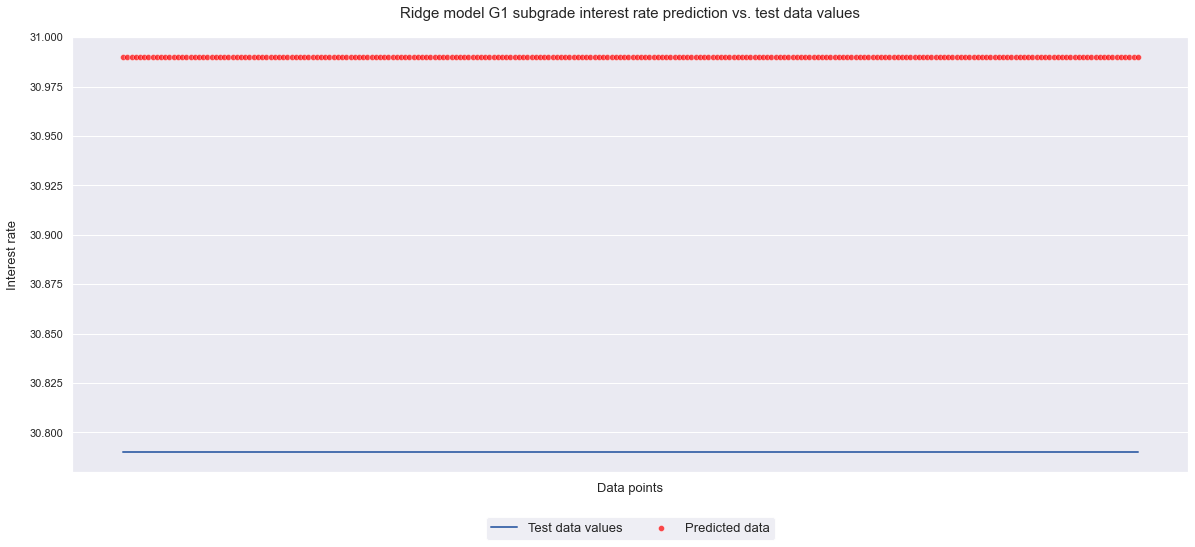

In [171]:
plot_reg(
    predicted_sorted,
    test_target_intrate_sorted,
    "Ridge model G1 subgrade interest rate prediction vs. test data values",
    "Interest rate",
)

We see that results are not so far off, from actual data. Although this is one of few models from 35 models which predicts quite reasonable value to the actual data. Other models are far off.

## Conclusion <a name="conclusion"></a>

**Classification models results**

In [174]:
accepted_results = results_hp_tuned_full_data.copy()
accepted_results = accepted_results[accepted_results.index == "LGBMClassifier"]
accepted_results.drop(
    ["Precision", "Recall", "Average precision", "Roc auc"], axis=1, inplace=True
)
accepted_results.index = ["LGBMClassifier-Accepted"]
grade_results = results_hp_tuned_full_data_grade.copy()
grade_results.index = ["LGBMClassifier-Grade"]
subgrade_results = final_table_subgrade.copy()
subgrade_results.index = [
    f"LGBMClassifier-{'-'.join(name.split('_')[:2])}"
    for name in subgrade_results.index.to_list()
]
final_table_clf = pd.concat([accepted_results, grade_results, subgrade_results])
final_table_clf.fillna(0, inplace=True)

In [179]:
final_table_clf.style.background_gradient(axis=0).format(precision=3)

,Balanced accuracy,Accuracy,F1,Total time in sec,F1 macro
LGBMClassifier-Accepted,0.959,0.985,0.926,32.103,0.000
LGBMClassifier-Grade,0.291,0.515,0.000,9.446,0.286
LGBMClassifier-Grade-A,0.351,0.377,0.000,2.628,0.321
LGBMClassifier-Grade-B,0.278,0.297,0.000,4.119,0.241
LGBMClassifier-Grade-C,0.259,0.272,0.000,5.625,0.229
LGBMClassifier-Grade-D,0.237,0.278,0.000,2.207,0.211
LGBMClassifier-Grade-E,0.272,0.292,0.000,1.458,0.259
LGBMClassifier-Grade-F,0.237,0.278,0.000,0.708,0.228
LGBMClassifier-Grade-G,0.233,0.259,0.000,0.767,0.228


**Regression model results**

In [181]:
intrate_results = final_table_intrate.copy()

In [191]:
intrate_results.sort_values(by="Root mean squared error")[:10].style.apply(
    highlight_min, subset=intrate_results.columns
).format(precision=3)

,Mean squared error,Root mean squared error,R2,Total time in sec
Regressor,,,,
Grade_a_subgrade_a1_intrate,0.000,0.000,0.000,0.082
Grade_g_subgrade_g2_intrate,0.000,0.000,0.000,0.002
Grade_g_subgrade_g1_intrate,0.000,0.000,0.750,0.001
Grade_g_subgrade_g4_intrate,0.000,0.000,0.000,0.001
Grade_g_subgrade_g5_intrate,0.000,0.000,0.000,0.002
Grade_g_subgrade_g3_intrate,0.000,0.008,-0.007,0.002
Grade_f_subgrade_f1_intrate,0.000,0.014,0.048,0.002
Grade_d_subgrade_d2_intrate,0.001,0.031,0.078,0.005
Grade_a_subgrade_a5_intrate,0.002,0.041,0.001,0.008


1.   First task, which was to predict whether client's application for a loan is going to be ```accepted or not```, yielded best results from this data set. Predicting loan's ```grade``` and ```subgrade``` categories resulted in lower metrics.
2.   For predicting ```accepted\rejected``` status we saw that most influential features that pushes model probability to positive outcome (application for a loan being accepted) are ```fico_score```, ```employment length``` being 1 or more year and ```debt-to-income``` ratio. 
3.   The most influential features that pushes this model probability to negative outcome (rejected) are high ```dti``` values, having ```less than 1 year``` work experience and bigger ```loan amount``` values.   
4.   For predicting a loan's ```grade``` - model was able to capture data patterns for ```A```, ```B``` and ```C``` grades categories, but failed to predict ```D```, ```E```, ```F``` and ```G``` grade categories resulting in an overall ```F1 macro``` score of **0.286**.
5.   Most important features for predicting ```grade``` categories are: ```fico_score```, ```loan_amount``` and loan's term of ```36 month```.
6.   Predicting loan's ```subgrade``` did not return positive results. Mainly because of low predicting power of our features.
6.   Our regression task results were not positive, least to say. Predicting ```interest rate``` yielded poor results, with low R2 scores. For some grades and subgrades models were able to predict ```int_rate``` quite close to the actual values but overall performance was poor.
7.   A classifier for whether to accept or reject client's loan application can be deployed to production as 93 times out of 100 it classified loan's applications correctly. Of course it should be tested on real data to check if performance does not go down.